In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize 

import warnings
warnings.filterwarnings("ignore")

# Import own libraries 
import os, sys
script_path = os.path.realpath(os.path.dirname("10_on_trajectories"))
os.chdir(script_path)
sys.path.append("..")

from myLibraries.queries import * 
from myLibraries.events import *
from myLibraries.theoretical_functions import *

In [3]:
HOLE_SIZE = 28
ACTIVITY = 0
MIN_PUBS = 15
EVENTS = get_collabs_event()
ALL_EVENTS = get_allEvents(EVENTS)

YEARS = get_str_years_event()

# get rid of misleading years
YEARS_TO_CONSIDER = YEARS[1: -6]
EVENTS_TO_CONSIDER = EVENTS[1: -6]

In [4]:
# how many authors with total number of publications >= minPubs? 

df = get_all_collabs()
max_pubs = df["tot_pubs"].max()

print("#pubs", "#auths", "percentage")
for minPubs in range(max_pubs):
    num_auths = len(get_all_collabs_by_hole_size(HOLE_SIZE, ACTIVITY, minPubs))
    print(minPubs, num_auths, "%.2f" % ((num_auths/len(df))*100), "%")

#pubs #auths percentage
0 232838 100.00 %
1 232838 100.00 %
2 106387 45.69 %
3 69048 29.65 %
4 50247 21.58 %
5 38913 16.71 %
6 31309 13.45 %
7 26062 11.19 %
8 22303 9.58 %
9 19442 8.35 %
10 17115 7.35 %
11 15288 6.57 %
12 13722 5.89 %
13 12402 5.33 %
14 11316 4.86 %
15 10346 4.44 %
16 9557 4.10 %
17 8840 3.80 %
18 8246 3.54 %
19 7679 3.30 %
20 7212 3.10 %
21 6780 2.91 %
22 6369 2.74 %
23 6014 2.58 %
24 5674 2.44 %
25 5380 2.31 %
26 5095 2.19 %
27 4835 2.08 %
28 4607 1.98 %
29 4380 1.88 %
30 4186 1.80 %
31 3998 1.72 %
32 3799 1.63 %
33 3597 1.54 %
34 3426 1.47 %


KeyboardInterrupt: 

# **Logarithmic Trajectories**

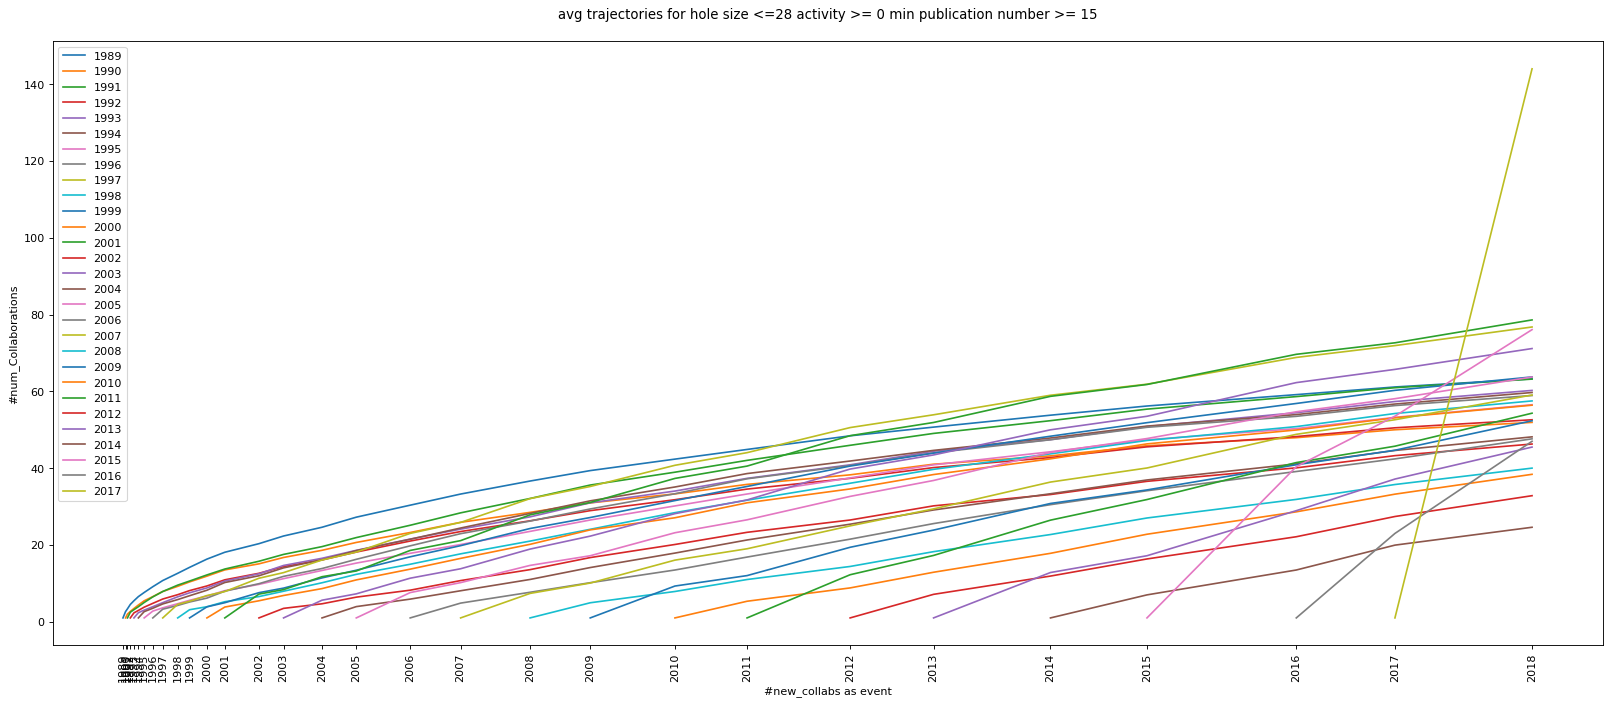

In [6]:
## Plot average trajectories 
plt.figure(figsize=(25, 10), dpi=80)
plt.title("avg trajectories for hole size <=" + str(HOLE_SIZE) + " activity >= " + str(ACTIVITY)+ " min publication number >= " + str(MIN_PUBS) + "\n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")
plt.xticks(rotation='vertical')

for start_y in YEARS[:-1]:
    x,y = get_avg_trajectories(EVENTS, HOLE_SIZE, start_y, activity=ACTIVITY, minPubs=MIN_PUBS)
    
    if(len(y)==1):
        plt.scatter(x,y)
    else:
        plt.plot(x,y)
    
    plt.xticks(x, y)
    plt.xticks(rotation='vertical')
    
plt.legend(YEARS, loc='upper left')
plt.xticks(EVENTS, YEARS)
plt.show()

# **(2) Plotting fitting function**

In [5]:
# how many authors by startying year?
df = get_all_collabs_by_hole_size(HOLE_SIZE, ACTIVITY, MIN_PUBS)
for start_y in YEARS[:-1]:
    print(start_y, len(df[df["start_year"] == int(start_y)]))

1989 0
1990 400
1991 328
1992 379
1993 439
1994 373
1995 403
1996 490
1997 480
1998 535
1999 394
2000 497
2001 466
2002 635
2003 506
2004 498
2005 572
2006 656
2007 538
2008 515
2009 363
2010 301
2011 208
2012 158
2013 107
2014 67
2015 23
2016 13
2017 1


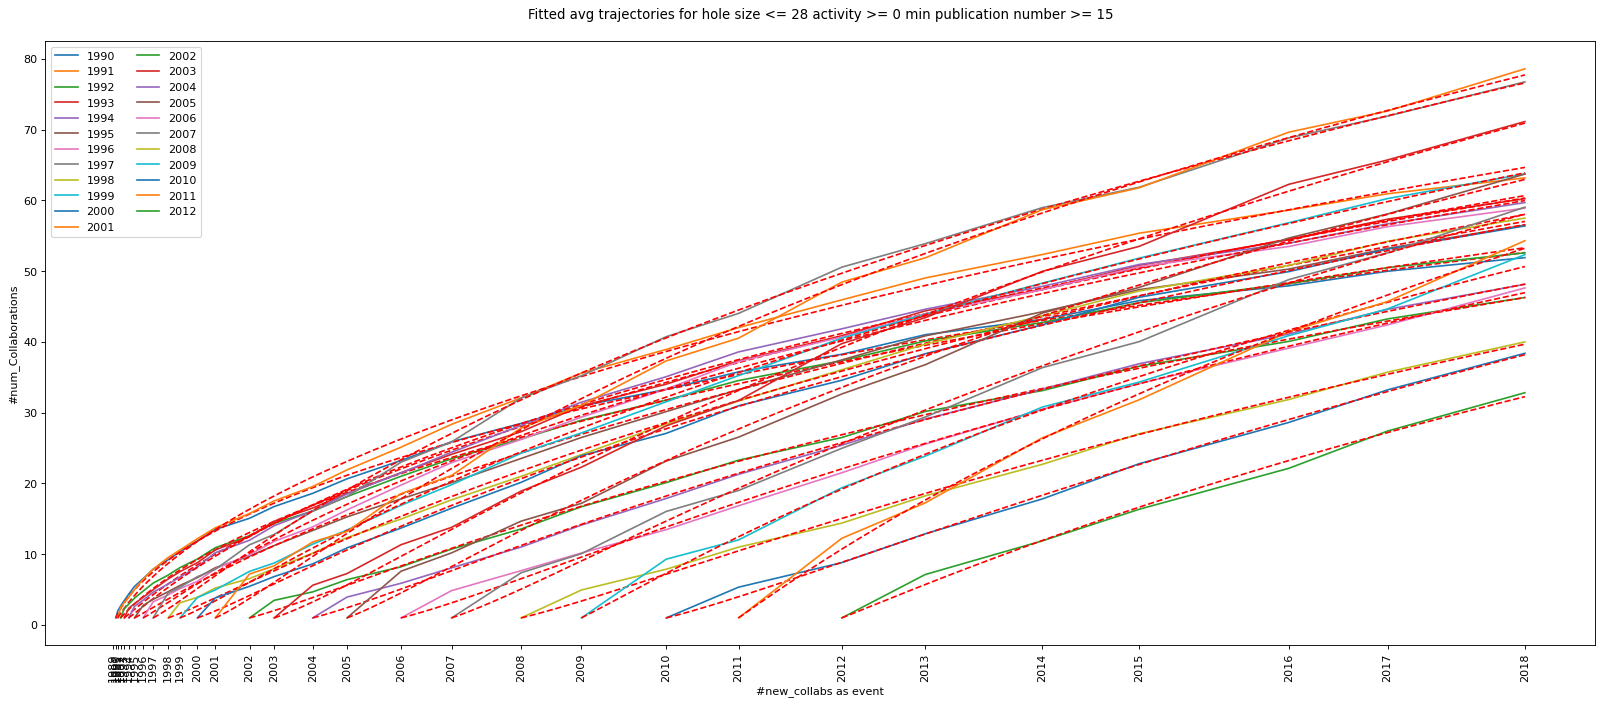

In [25]:
## Plot fitted average trajectories
plt.figure(figsize=(25, 10), dpi=80)
plt.title("Fitted avg trajectories for hole size <= " + str(HOLE_SIZE ) + " activity >= " + str(ACTIVITY)+ " min publication number >= " + str(MIN_PUBS) + "\n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")
plt.xticks(rotation='vertical')

alphas = []
betas = []
for start_y in YEARS_TO_CONSIDER:
    
    
    x,y = get_avg_trajectories(EVENTS, HOLE_SIZE, start_y, activity=ACTIVITY, minPubs=MIN_PUBS) # retrieve average trajecory for the given start_y (and hole size)     
    
    fit_y, alpha, beta = fit_trajectory(x, y) # fit the real data above with the theoretical trajectory 
    
    xdata = [a for a in range(x[0], x[-1])]
    fit_y = theoretical_func(xdata, alpha, beta, x[0])

    # save fitted parameters alpha, beta
    alphas.append(alpha)
    betas.append(beta)
        
    plt.plot(x,y, label=str(start_y))
    plt.plot(xdata, fit_y, 'r--')
   
plt.xticks(rotation='vertical')    
plt.legend(loc='upper left', ncol=2)
plt.xticks(EVENTS, YEARS)
plt.show()

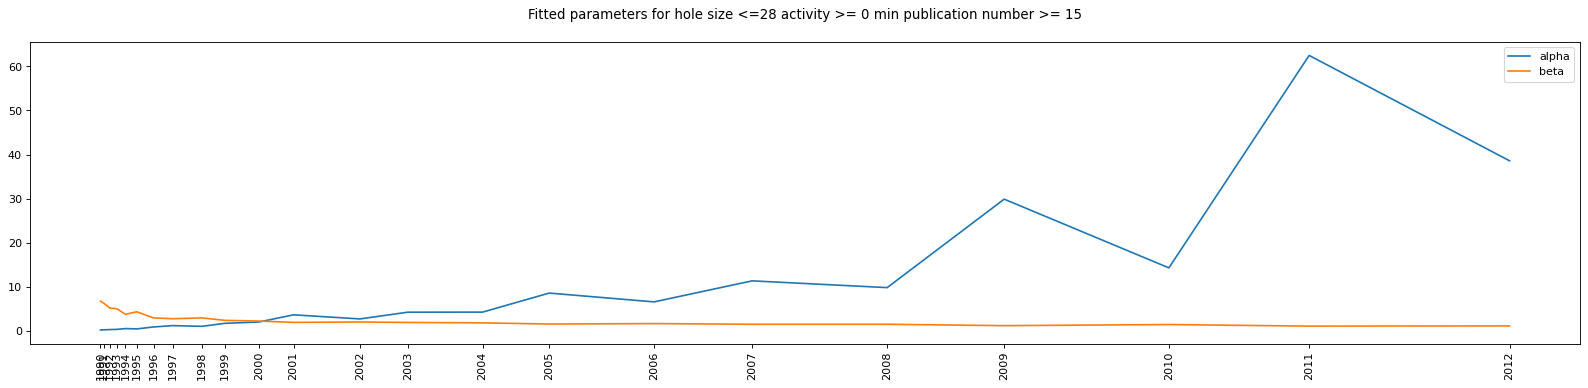

   start_y      alpha      beta
0     1990   0.128220  6.685163
1     1991   0.169568  6.130362
2     1992   0.224408  5.104173
3     1993   0.265064  4.964572
4     1994   0.451888  3.686884
5     1995   0.376265  4.268505
6     1996   0.817746  2.875771
7     1997   1.125992  2.690430
8     1998   0.960042  2.869156
9     1999   1.646423  2.314993
10    2000   1.937917  2.162361
11    2001   3.577062  1.859176
12    2002   2.642887  1.945386
13    2003   4.172617  1.845890
14    2004   4.189397  1.746146
15    2005   8.516422  1.483740
16    2006   6.514072  1.584083
17    2007  11.292268  1.429751
18    2008   9.757690  1.430189
19    2009  29.853649  1.113554
20    2010  14.241902  1.367725
21    2011  62.505417  1.006467
22    2012  38.567151  1.059953


In [26]:
## Plotting and Printing fitted parameters alpha and beta for each starting year
plt.figure(figsize=(25, 5), dpi=80)
plt.title("Fitted parameters for hole size <=" + str(HOLE_SIZE) + " activity >= " + str(ACTIVITY)+ " min publication number >= " + str(MIN_PUBS) + "\n", fontdict = {'fontsize' : 12})

plt.plot(EVENTS_TO_CONSIDER, alphas, label="alpha")
plt.plot(EVENTS_TO_CONSIDER, betas, label="beta")
plt.xticks(EVENTS_TO_CONSIDER, YEARS_TO_CONSIDER)
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

print(pd.DataFrame([[YEARS_TO_CONSIDER[i], alphas[i], betas[i]] for i in range(len(alphas))], columns=["start_y", "alpha", "beta"]))

# **(3)** Find **alpha\* and beta\*** to have a function **f\*** minimizing the **errors**

given a starting event $i$:
- Let $e$ be a generic event
- Let $r_i(e)$ be the function representing the real average trajectory for authors who started to publish at the event $i$
- Let $f_i(e)$ be the fitted function of $r_i(e)$
- Let $f_i^*(e)$ be the general fitting function of which we want to optimized the parameters, for authors who started to publish at the event $i$

#### A) $min_{\alpha^*,\sigma^*} \Biggl( \sum_i \sum_{e\geq i} |f_i^* (e) - r_i(e) |^2 \Biggr)$
#### B) $min_{\alpha^*,\sigma^*} \Biggl( \sum_i \max_{e\geq i} |f_i^* (e) - r_i(e) |^2 \Biggr)$ 

#### C) $min_{\alpha^*,\sigma^*} \Biggl( \sum_i \sum_{e\geq i} |f_i^* (e) - f_i(e) |^2 \Biggr)$ 
#### D) $min_{\alpha^*,\sigma^*} \Biggl( \sum_i \max_{e\geq i} |f_i^* (e) - f_i(e) |^2 \Biggr)$ 

In [7]:
 ##### ERRORS FUNCTIONS FOR AVERAGE TRAJECTORIES #####

YEARS = get_str_years_event()

## error function to minimize in order to find alpha* and beta*
    ## this function compare f* with real data 
def err_f_A(params, xdata, years_to_consider=YEARS):
    opt_alpha, opt_beta = params
    err = 0
    for start_y in years_to_consider:
        i = YEARS.index(start_y)
        x,y = get_avg_trajectories(xdata, HOLE_SIZE, start_y, activity=ACTIVITY, minPubs=MIN_PUBS)
        for curr_y in YEARS[i:][:-1]:
            e = YEARS.index(curr_y)
            err += pow(abs(theoretical_func(xdata[e], opt_alpha, opt_beta, xdata[i]) - y[YEARS[i:][:-1].index(curr_y)]), 2)

    sys.stdout.write('\r'+ "optimizing A function with -> params: " + str(params) +", error: "+ str(err))
    return err

## error function to minimize in order to find alpha* and beta*
    ## this function compare f* with real data 
def err_f_B(params, xdata, years_to_consider=YEARS):
    opt_alpha, opt_beta = params
    
    err = 0
    for start_y in years_to_consider:
        i = YEARS.index(start_y)
        
        x,y = get_avg_trajectories(xdata, HOLE_SIZE, start_y, activity=ACTIVITY, minPubs=MIN_PUBS)
        
        tmp = []
        for curr_y in YEARS[i:][:-1]:
            e = YEARS.index(curr_y)
        
            tmp.append(pow(abs(theoretical_func(xdata[e], opt_alpha, opt_beta, xdata[i]) - y[YEARS[i:][:-1].index(curr_y)]), 2))
        err += np.max(tmp)
    
    sys.stdout.write('\r'+ "optimizing B function with -> params: " + str(params) +", error: "+ str(err))
    return err

SUBSET_SIZE = 200 # the next error function works on all events, choose the number of event to be considered 

## error function to minimize in order to find alpha* and beta*
    ## this function compare f* with fitted data f_i 
        ## we consider a subset of events for computational costs
def err_f_C(params, xdata, years_to_consider=YEARS):
    opt_alpha, opt_beta = params
    
    size = SUBSET_SIZE # subset of events to consider 
        
    err = 0
    for start_y in years_to_consider:
        

    
        i = YEARS.index(start_y)    
        curr_x = xdata[i]  
        
        all_events = [e for e in range(curr_x, xdata[-1])]
        next_events = all_events
        n = (len(next_events))//size
        
        if(n>0):

            events_subset = [next_events[e] for e in range(len(next_events)) if e%n==0][:size]
            
            x,y = get_avg_trajectories(xdata, HOLE_SIZE, start_y, activity=ACTIVITY, minPubs=MIN_PUBS)
            fit_y, alpha, beta = fit_trajectory(x, y) # fit the real data above with the theoretical trajectory 
            

            for e in events_subset:
                if(e>curr_x):
                    err += pow(abs(theoretical_func(e, opt_alpha, opt_beta, xdata[i]) - theoretical_func(e, alpha, beta, xdata[i])), 2)

    sys.stdout.write('\r'+ "optimizing C function with " + str(size) + " events -> params: " + str(params) +", error: "+ str(err))
    return err

## error function to minimize in order to find alpha* and beta*
    ## this function compare f* with fitted data f_i 
        ## we consider a subset of events for computational costs
def err_f_D(params, xdata, years_to_consider=YEARS):
    
    opt_alpha, opt_beta = params
    
    size = SUBSET_SIZE # subset of events to consider 

    
    err = 0
    for start_y in years_to_consider:
        i = YEARS.index(start_y)
        
        curr_x = xdata[i] 
        
        all_events = [e for e in range(curr_x, xdata[-1])]
        next_events = all_events
        n = (len(next_events))//size
        
        if(n>0): 
            
            events_subset = [next_events[e] for e in range(len(next_events)) if e%n==0][:size]

            x,y = get_avg_trajectories(xdata, HOLE_SIZE, start_y, activity=ACTIVITY, minPubs=MIN_PUBS)
            fit_y, alpha, beta = fit_trajectory(x, y) # fit the real data above with the theoretical trajectory 

            tmp = []
            for e in events_subset:
                if(e>curr_x):
                    tmp.append(pow(abs(theoretical_func(e, opt_alpha, opt_beta, xdata[i]) - theoretical_func(e, alpha, beta, xdata[i])), 2))
                
            if((len(tmp))!=0):
                err += np.max(tmp)
        
    sys.stdout.write('\r'+ "optimizing D function with " + str(size) + " events -> params: " + str(params) +", error: "+ str(err))
    return err

In [28]:
## optimize alpha* and beta* for each error function defined above 
alphas_opt,betas_opt, errs = [],[],[]

start_params = [1, 1]
bnds = ((0, None), (1, None))

# retrieve alpha* and beta* minimizing the associated function and
    # compute the error made by the optimized parameters 

result_A = minimize(err_f_A, start_params, args=(EVENTS, YEARS_TO_CONSIDER), bounds=bnds)
fitted_params_A = result_A.x
alphas_opt.append(fitted_params_A[0])
betas_opt.append(fitted_params_A[1])
errs.append(err_f_A(fitted_params_A, EVENTS, YEARS_TO_CONSIDER))
print()

result_B = minimize(err_f_B, [1, 1], args=(EVENTS, YEARS_TO_CONSIDER), bounds=bnds)
fitted_params_B = result_B.x
alphas_opt.append(fitted_params_B[0])
betas_opt.append(fitted_params_B[1])
errs.append(err_f_B(fitted_params_B, EVENTS, YEARS_TO_CONSIDER))
print()


result_C = minimize(err_f_C, [1, 1], args=(EVENTS, YEARS_TO_CONSIDER), bounds=bnds)
fitted_params_C = result_C.x
alphas_opt.append(fitted_params_C[0])
betas_opt.append(fitted_params_C[1])
errs.append(err_f_C(fitted_params_C, EVENTS, YEARS_TO_CONSIDER))
print()

result_D = minimize(err_f_D, [1, 1], args=(EVENTS, YEARS_TO_CONSIDER), bounds=bnds)
fitted_params_D = result_D.x
alphas_opt.append(fitted_params_D[0])
betas_opt.append(fitted_params_D[1])
errs.append(err_f_D(fitted_params_D, EVENTS,  YEARS_TO_CONSIDER))
print()


optimizing A function with -> params: [9.9487765 1.       ], error: 85847.260192885751697
optimizing B function with -> params: [13.97097574  1.        ], error: 15694.765007896633
optimizing C function with 200 events -> params: [11.93853438  1.        ], error: 1503334.5444036433
optimizing D function with 200 events -> params: [14.49941894  1.        ], error: 18117.099420199545


In [8]:
alphas_opt = [9.9487765, 13.97097574, 11.93853438, 14.49941894]
betas_opt = [1, 1, 1, 1 ]
errs = [85847.260192885751697, 15694.765007896633, 1503334.5444036433, 18117.099420199545]
print()
print(pd.DataFrame([[errs[i], alphas_opt[i], betas_opt[i]] for i in range(len(errs))], ["err_f_A", "err_f_B", "err_f_C", "err_f_D"], ["ERROR", "alpha", "beta",]))


                ERROR      alpha  beta
err_f_A  8.584726e+04   9.948776     1
err_f_B  1.569477e+04  13.970976     1
err_f_C  1.503335e+06  11.938534     1
err_f_D  1.811710e+04  14.499419     1


# **(4) Shift fitted trajectories, compute their average and fit it**

In [30]:
# Shift all fitted trajectories
shifted_funcs = []

i = 0
for i in range(len(alphas)):
    
    x,y = get_avg_trajectories(EVENTS, HOLE_SIZE, YEARS_TO_CONSIDER[i], activity=ACTIVITY, minPubs=MIN_PUBS)

    xdata = [e+x[0] for e in ALL_EVENTS]        
    f = theoretical_func(xdata, alphas[i], betas[i], x[0])

    shifted_funcs.append(f) # add function to the set
    i+=1
    
# compute the average of the shifted functions
avg_shift = np.average(np.array(shifted_funcs), axis=0)

In [31]:
# fit the average curve
fit_avg_shift, alpha, beta = fit_trajectory(ALL_EVENTS, avg_shift) 

print("The fitted parameters are:")
print(" alpha*:", alpha, "\n beta*:", beta)

The fitted parameters are:
 alpha*: 6.207397895206617e-05 
 beta*: 4220.577970627436


In [9]:
alpha, beta = 6.207397895206617e-05, 4220.577970627436
fit_avg_shift = theoretical_func(ALL_EVENTS, alpha, beta, np.int64(1))

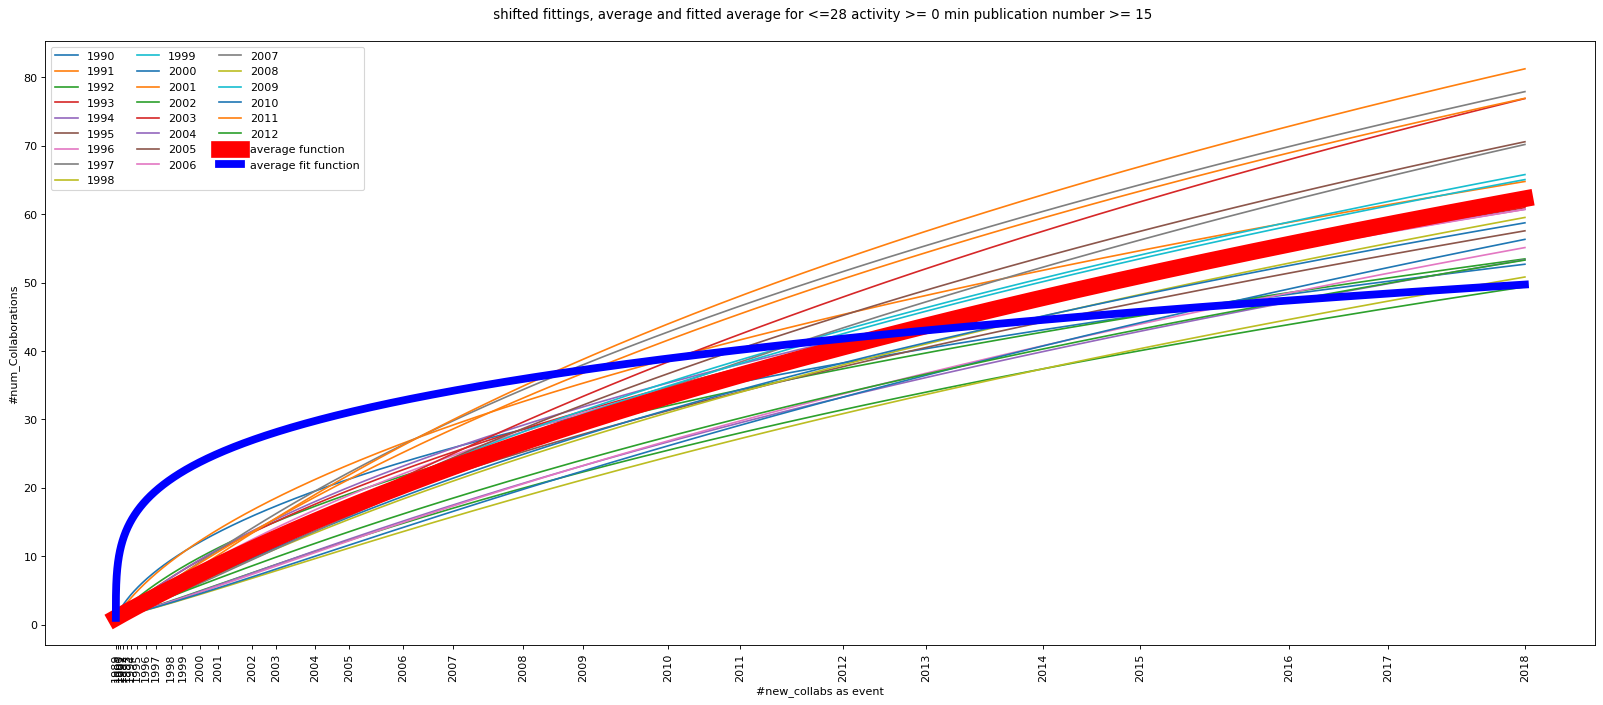

In [33]:
# plot shifted trajectories, theri average and tit's fitting
plt.figure(figsize=(25, 10), dpi=80)
plt.title(" shifted fittings, average and fitted average for <=" + str(HOLE_SIZE) + " activity >= " + str(ACTIVITY)+ " min publication number >= " + str(MIN_PUBS) +  "\n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")
plt.xticks(rotation='vertical')

j = 0
for start_y in YEARS_TO_CONSIDER:
    plt.plot(ALL_EVENTS,shifted_funcs[j], label=start_y)
    j = j+1    
    
    
plt.plot(ALL_EVENTS, avg_shift, 'r-+', label="average function",  linewidth=15.0)
plt.plot(ALL_EVENTS, fit_avg_shift, 'b-', label="average fit function", linewidth=7.0)

plt.xticks(rotation='vertical')    
plt.legend(loc='upper left', ncol=3)
plt.xticks(EVENTS, YEARS)
plt.show()

# **(5) compare general fitting error functions A,B,C and D with the general average fitted one**  

### Error fitted trajectories

In [10]:
## get general fitting functions by starting year for each couple of parameter found above 
error_f_labels = ["A", "B", "C", "D"] 
error_fit_functions = {}

for i in range(len(error_f_labels)):
    # get general error fitted functions by starting year
    functions_by_start_y = [] # contains fitted error functions for each year 
    for start_y in YEARS_TO_CONSIDER:
        curr_x = EVENTS[YEARS.index(start_y)]  
        x,y = get_avg_trajectories(EVENTS, HOLE_SIZE, start_y, activity=ACTIVITY, minPubs=MIN_PUBS) # retrieve average trajecory for the given start_y (and hole size) 
        
        xdata = [e for e in range(x[0], x[-1])] # xdata is the list of events
        general_fit_y = theoretical_func(xdata, alphas_opt[i], betas_opt[i], curr_x)
        functions_by_start_y.append(general_fit_y)

    error_fit_functions[error_f_labels[i]] = functions_by_start_y

### Average fitted trajectories

In [11]:
## get general fitting functions for each starting year for alpha* and beta* of the fitted average
average_fit_functions = [] # contains fitted error functions for each year 
for start_y in YEARS_TO_CONSIDER:

    x,y = get_avg_trajectories(EVENTS, HOLE_SIZE, start_y, activity=ACTIVITY, minPubs=MIN_PUBS) # retrieve average trajecory for the given start_y (and hole size) 
    xdata = [e-x[0] for e in range(x[0],x[-1])]
    
    general_fit_y = theoretical_func(xdata, alpha, beta, np.int64(1))
    average_fit_functions.append(general_fit_y)

### **plot everything**

In [15]:
# given the start_y to consider it plots the real curver, the error fitted one and the average fitted toghether 
def plot_all(start_y):
    plt.figure(figsize=(25, 10), dpi=80)
    plt.title("compare general fitting error functions with the general average fitted one for the starting year " + start_y + " for hole size <=" + str(HOLE_SIZE) + " activity >= " + str(ACTIVITY)+ " min publication number >= " + str(MIN_PUBS)  +  "\n", fontdict = {'fontsize' : 12})
    plt.xlabel("#new_collabs as event")
    plt.ylabel("#num_Collaborations")
    plt.xticks(rotation='vertical')

    j = YEARS_TO_CONSIDER.index(start_y)
    x,y = get_avg_trajectories(EVENTS, HOLE_SIZE, start_y, activity=ACTIVITY, minPubs=MIN_PUBS) # retrieve average trajecory for the given start_y (and hole size) 
    plt.plot(x,y, label="real data")

    xdata = [e for e in range(x[0],x[-1])]

    for i in range(len(error_f_labels)):
        err_f = error_fit_functions[error_f_labels[i]][j]
        plt.plot(xdata, err_f, label="error fit function "+ error_f_labels[i])

    #plt.plot(xdata, average_fit_functions[j], label="average fit function")

    plt.xticks(rotation='vertical')    
    plt.legend(loc='upper left')    
    plt.xticks(x, YEARS[YEARS.index(start_y):])
    plt.show()

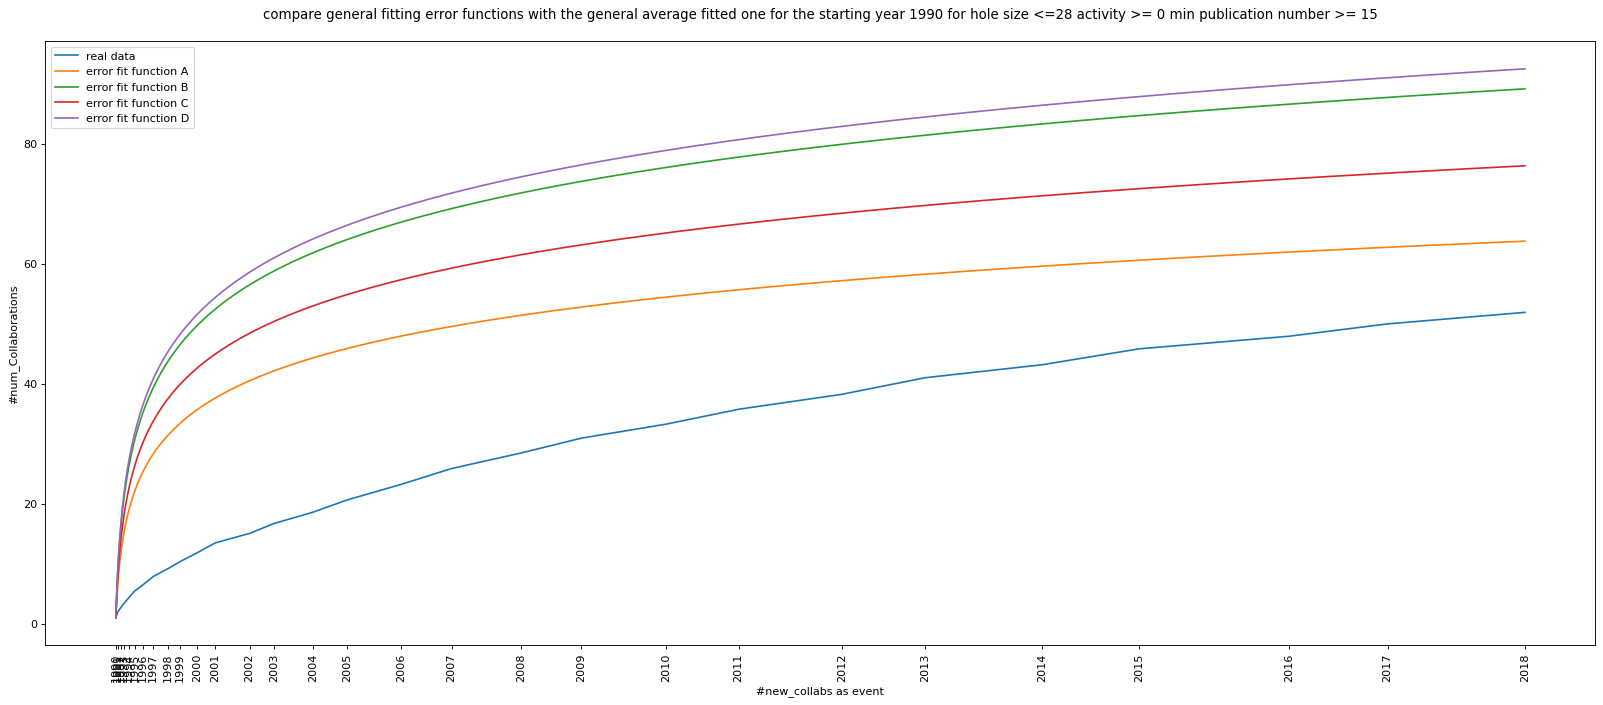

In [16]:
plot_all("1990")

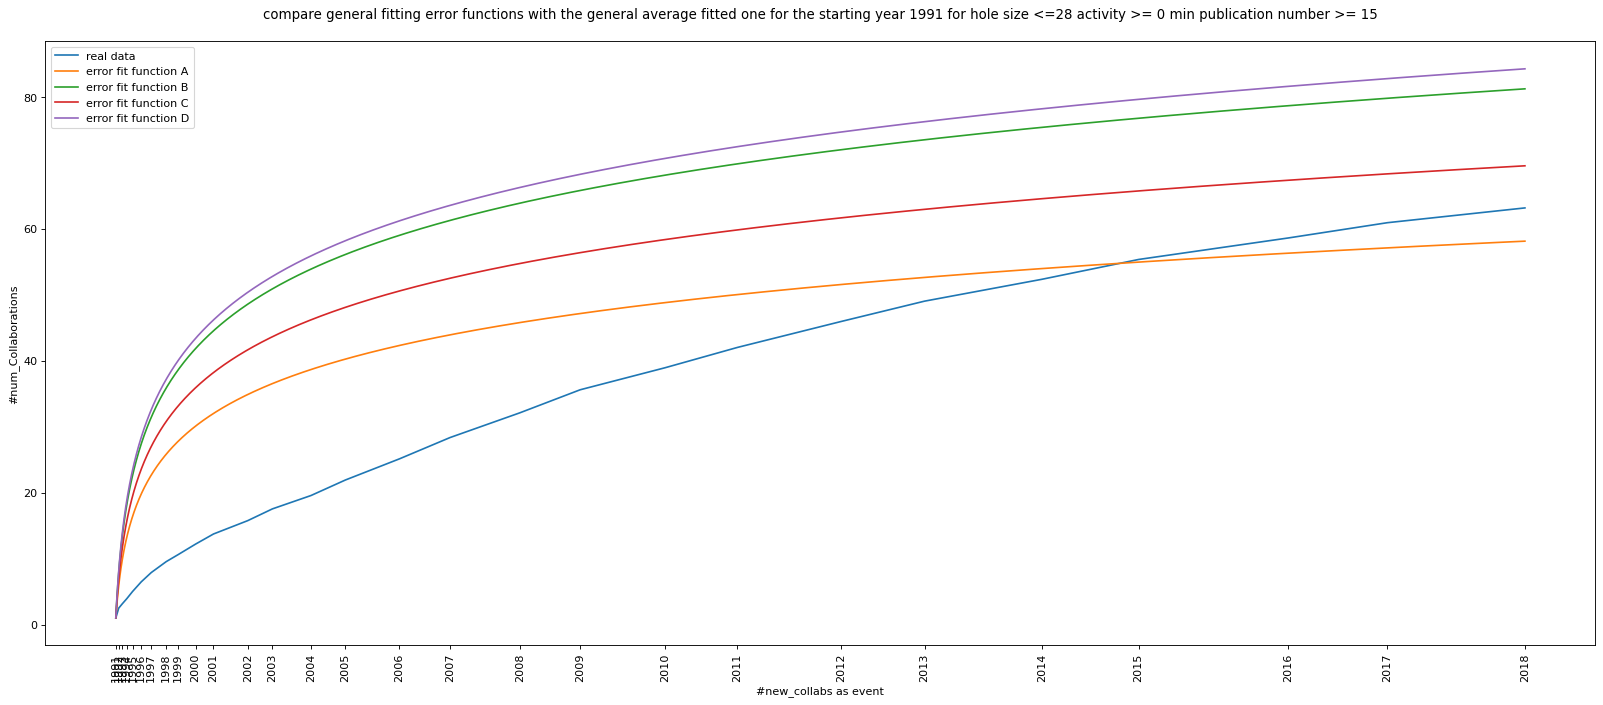

In [17]:
plot_all("1991")

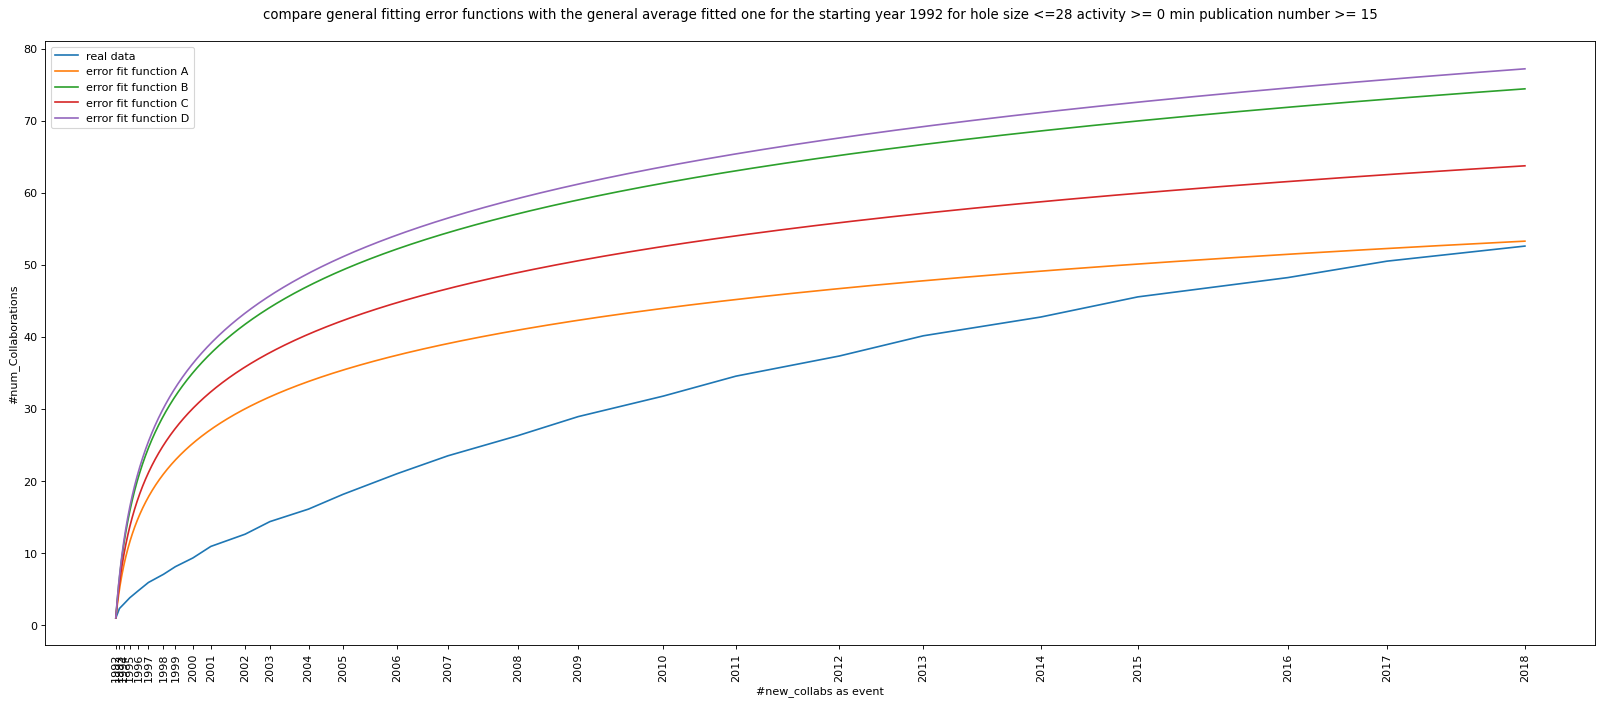

In [18]:
plot_all("1992")

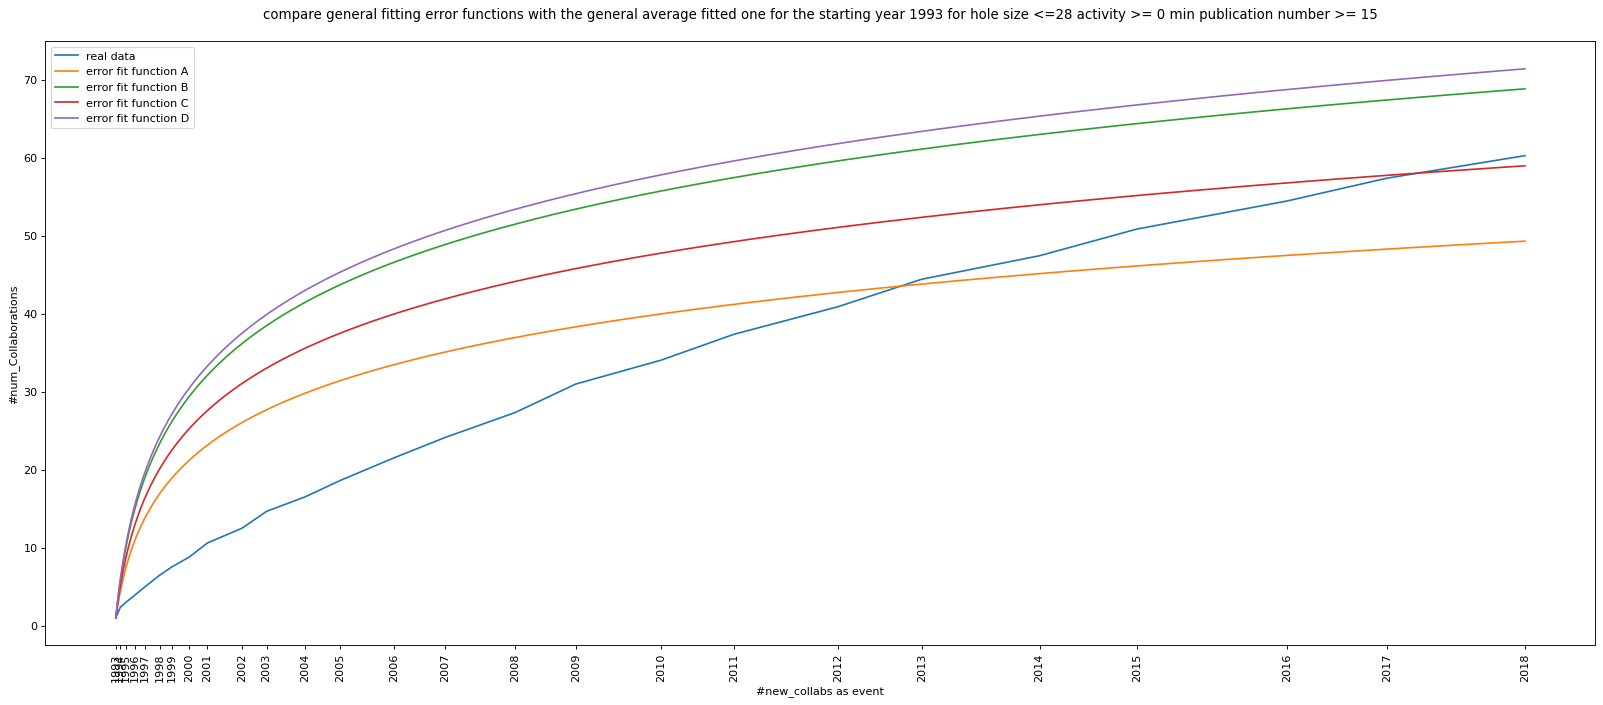

In [19]:
plot_all("1993")

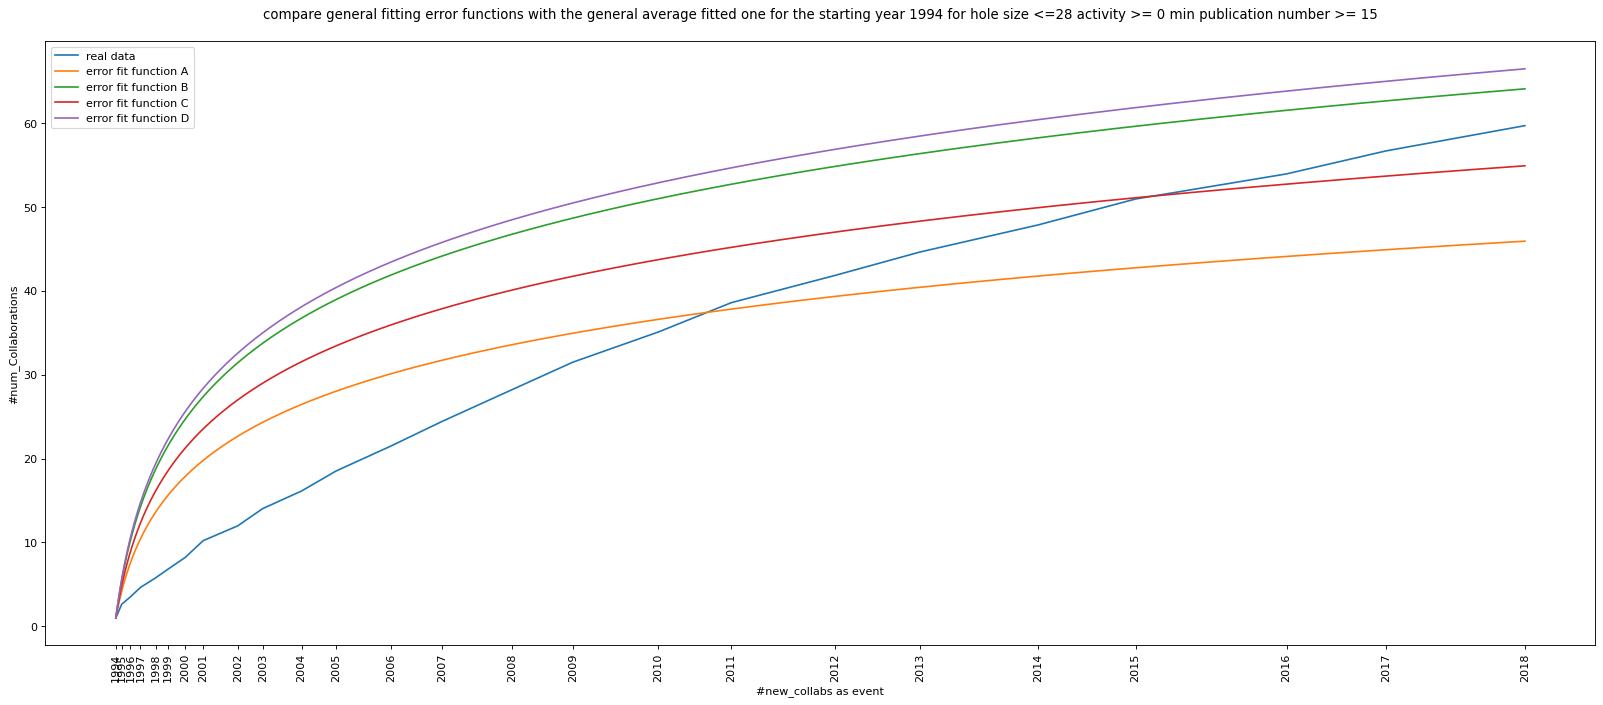

In [20]:
plot_all("1994")

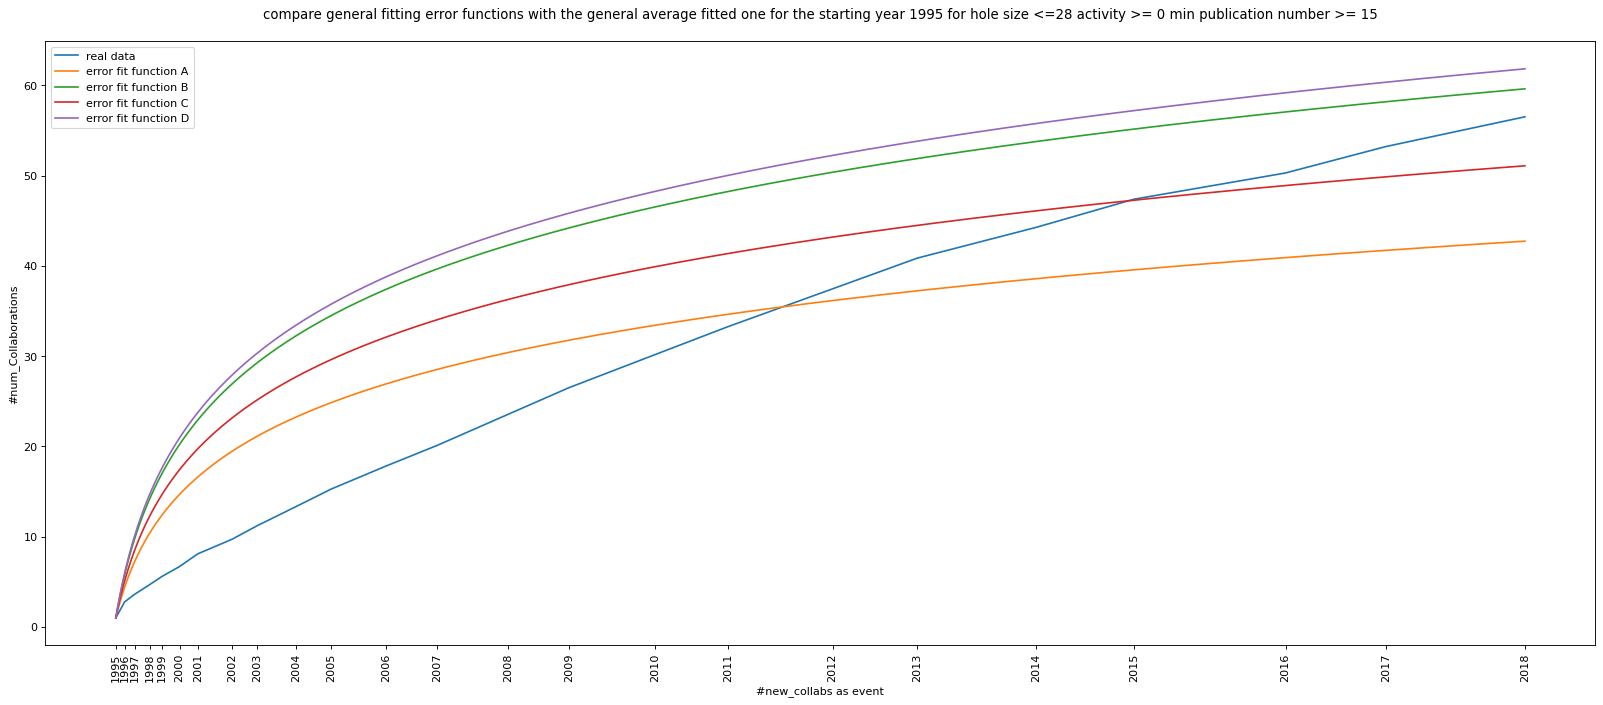

In [21]:
plot_all("1995")

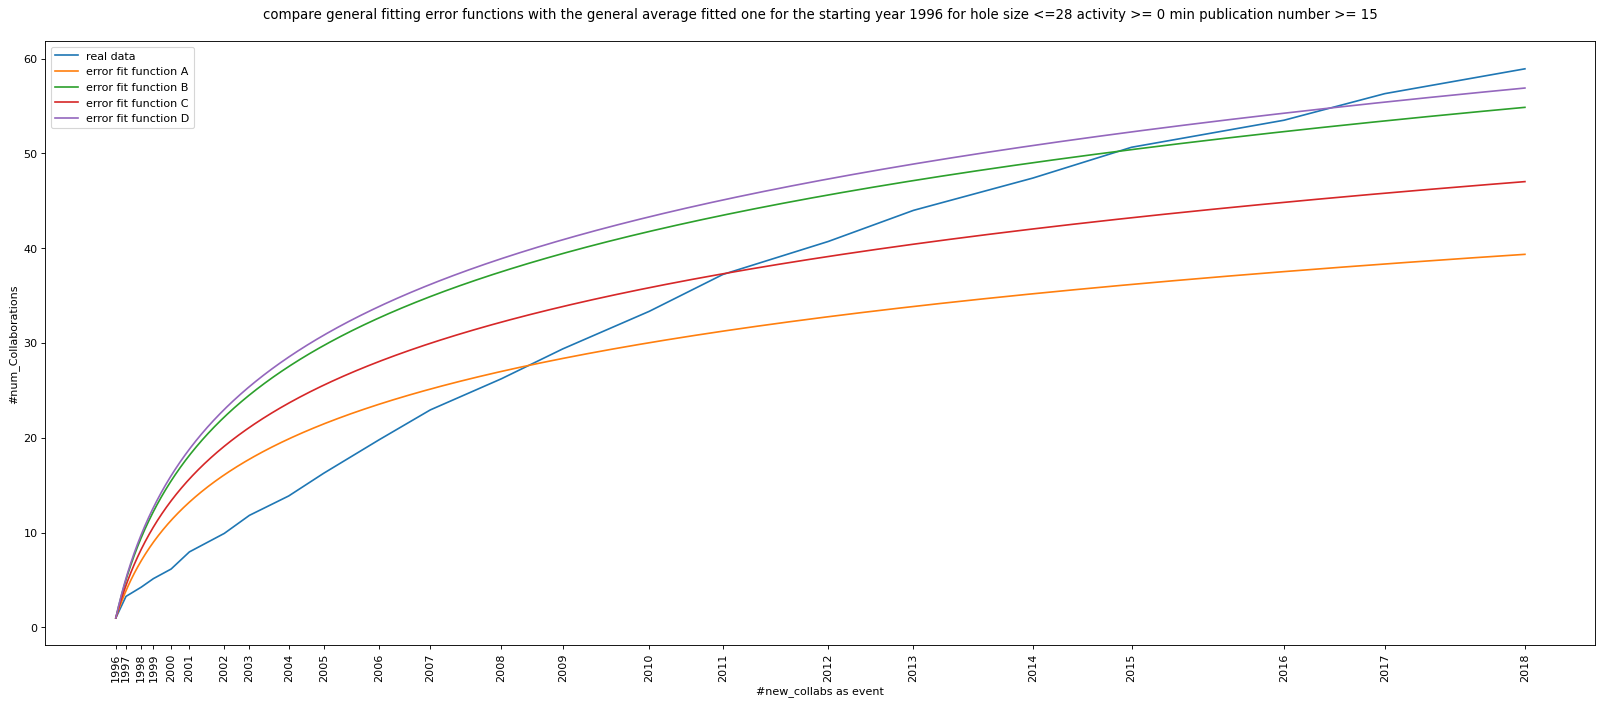

In [22]:
plot_all("1996")

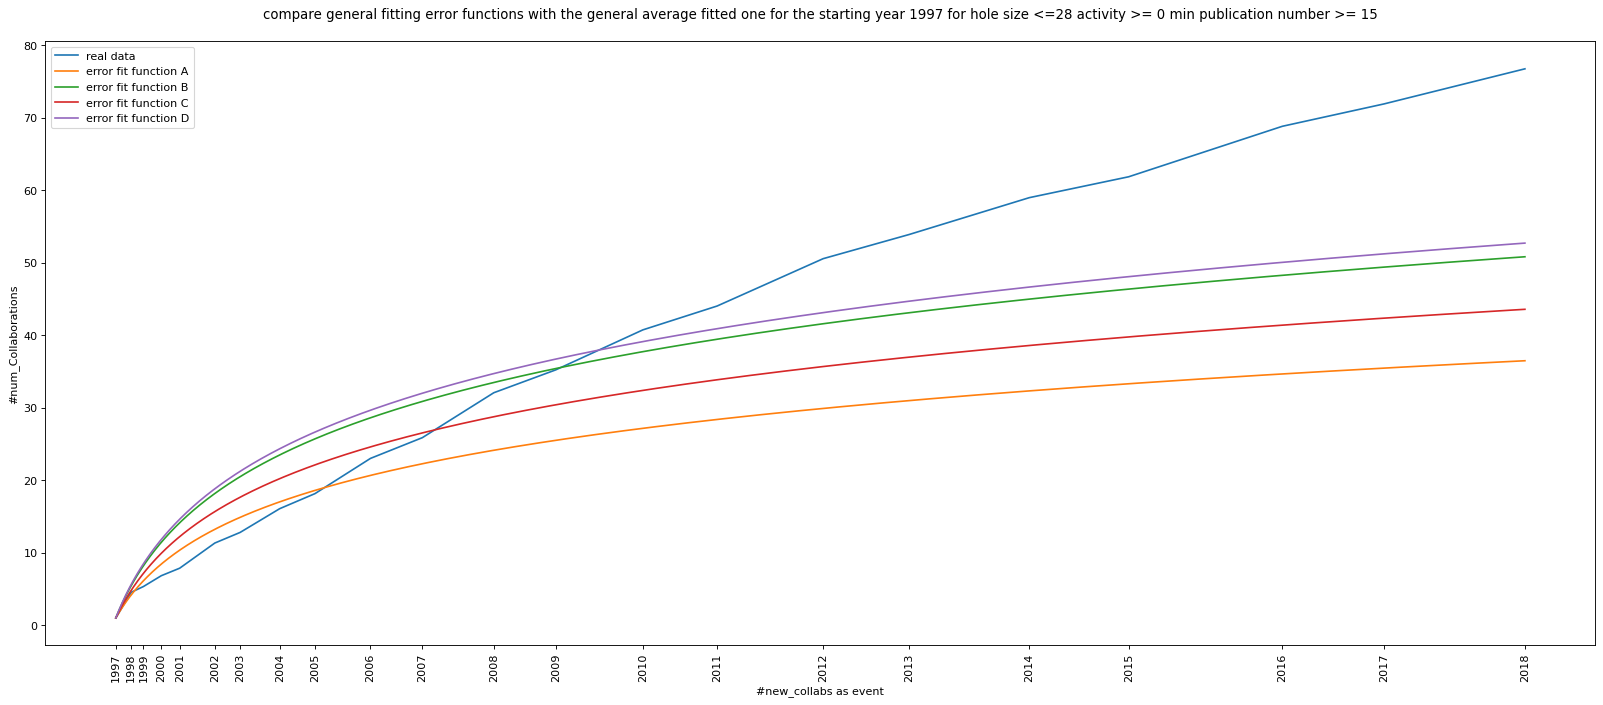

In [23]:
plot_all("1997")

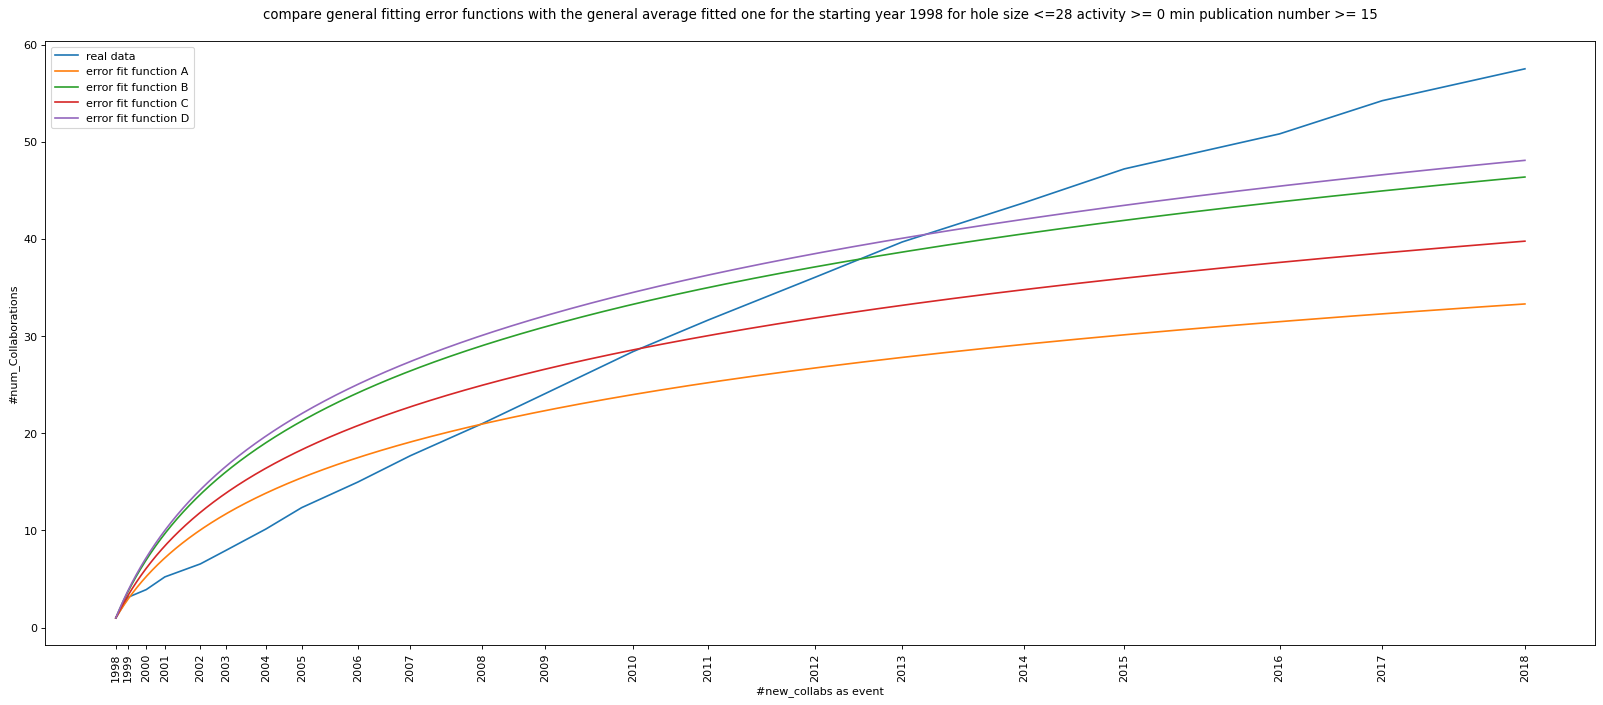

In [24]:
plot_all("1998")

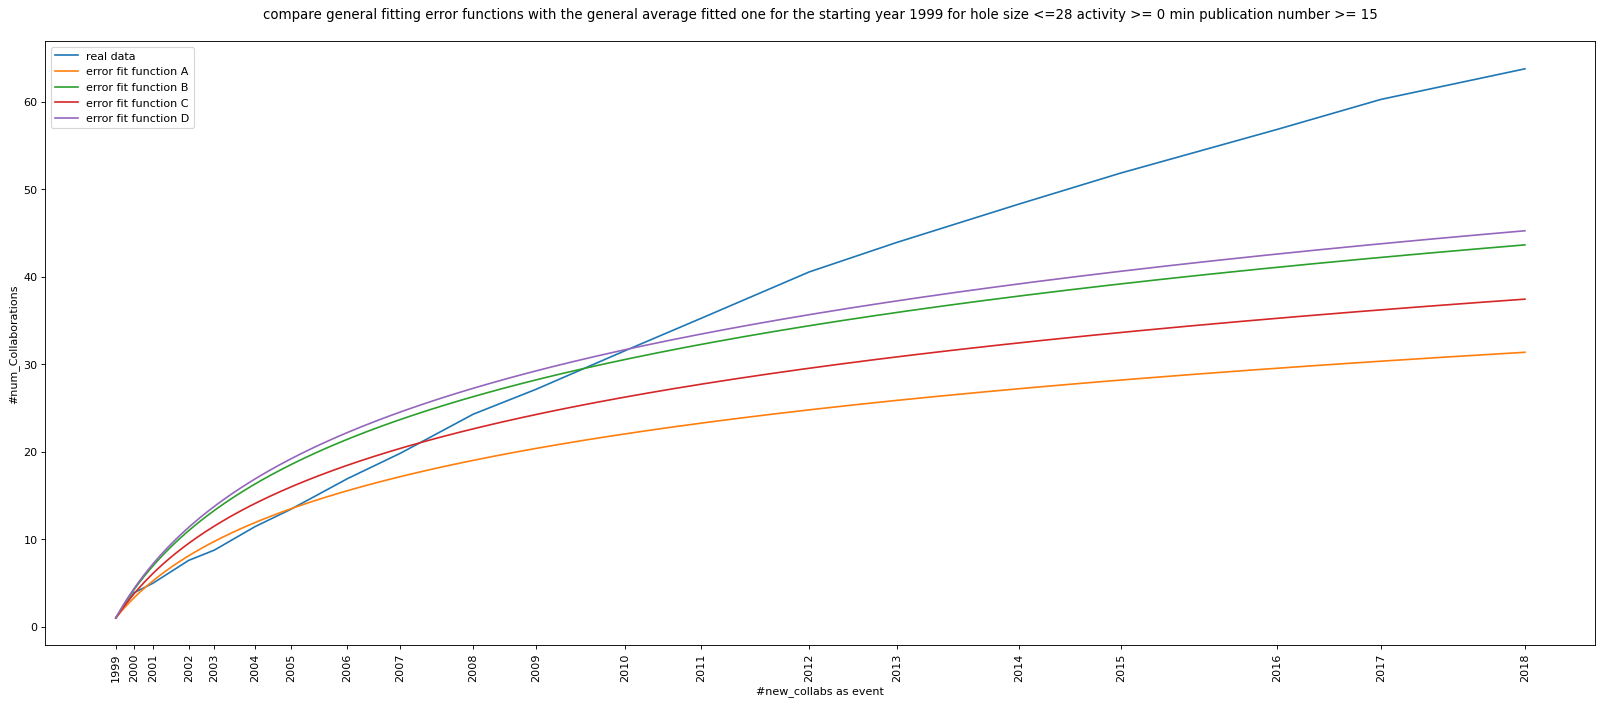

In [25]:
plot_all("1999")

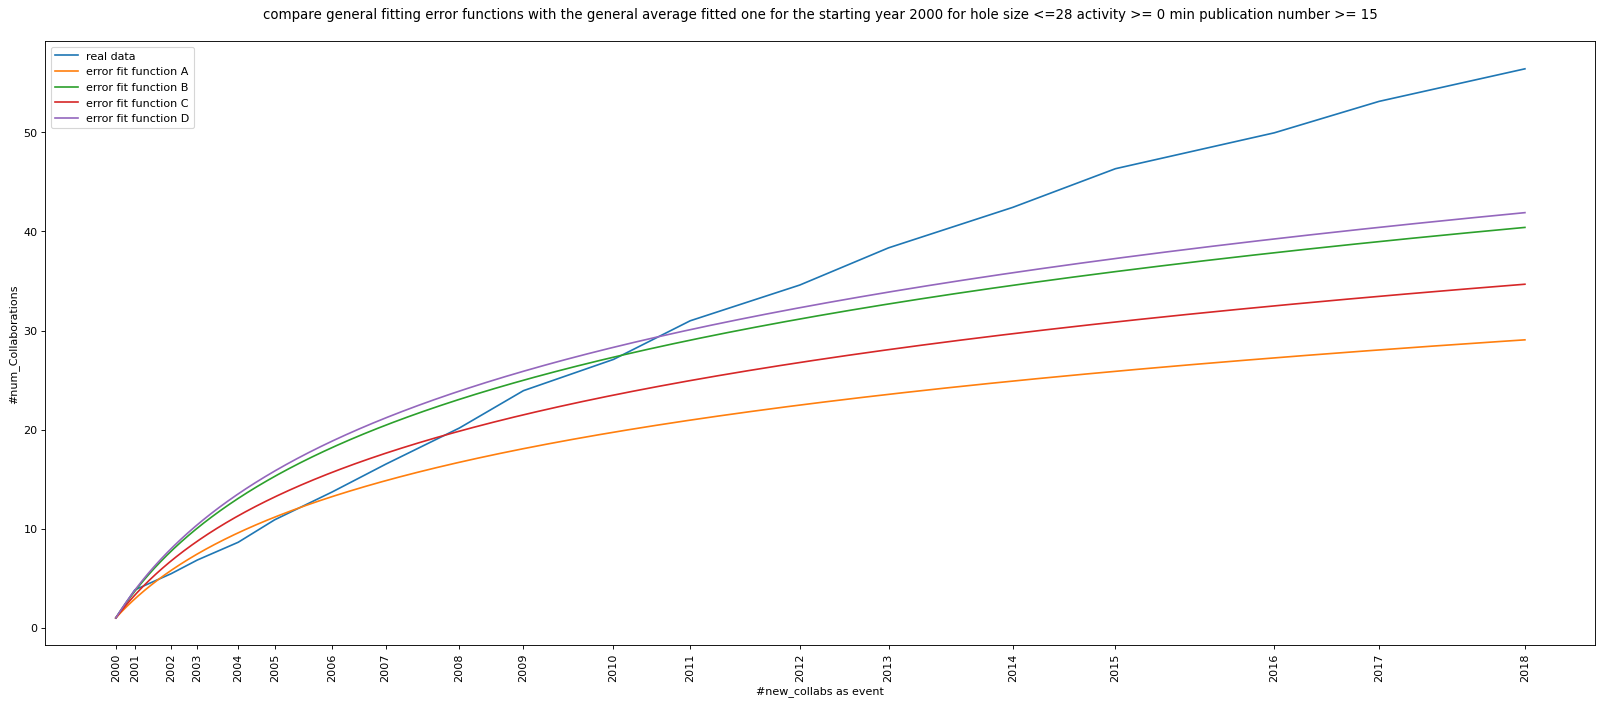

In [26]:
plot_all("2000")

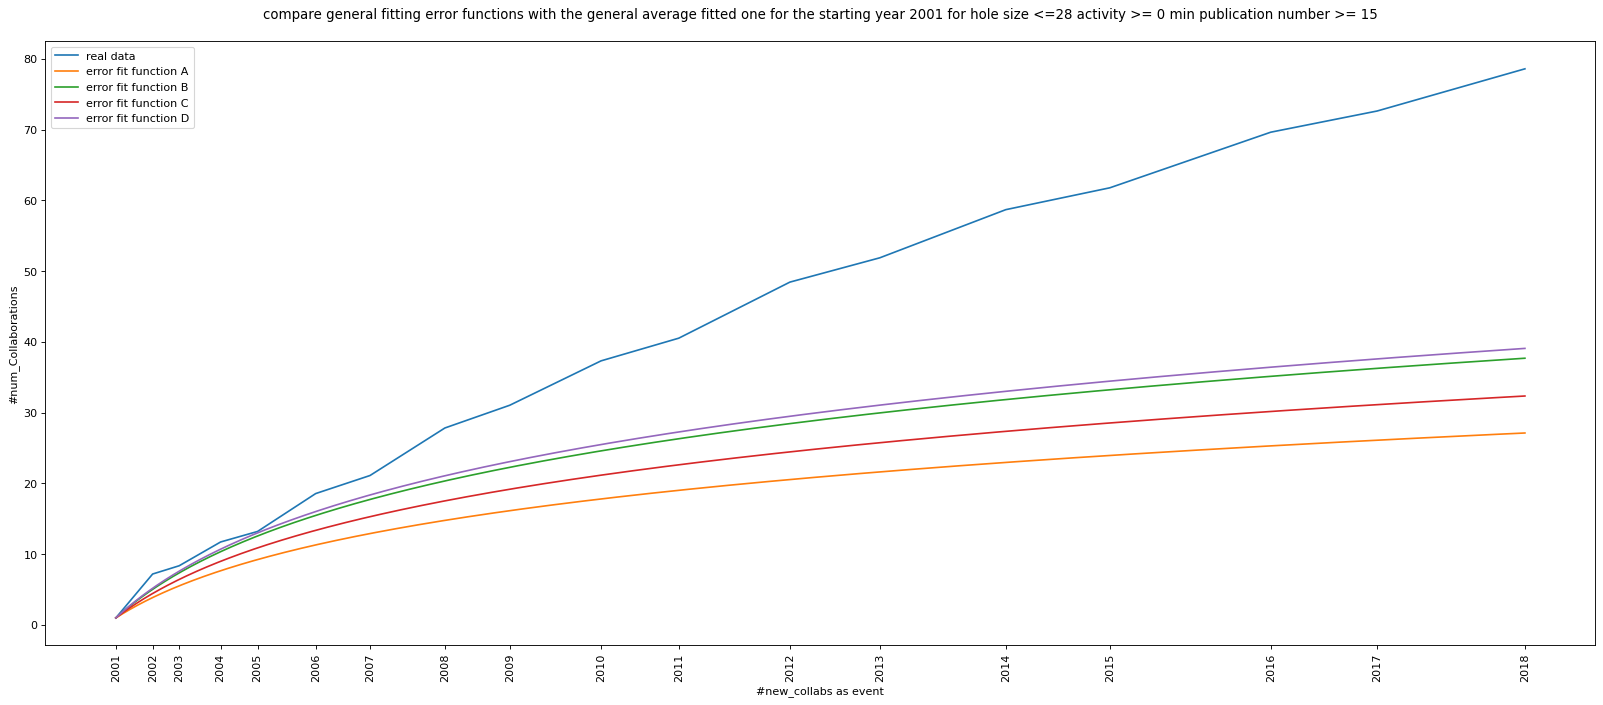

In [27]:
plot_all("2001")

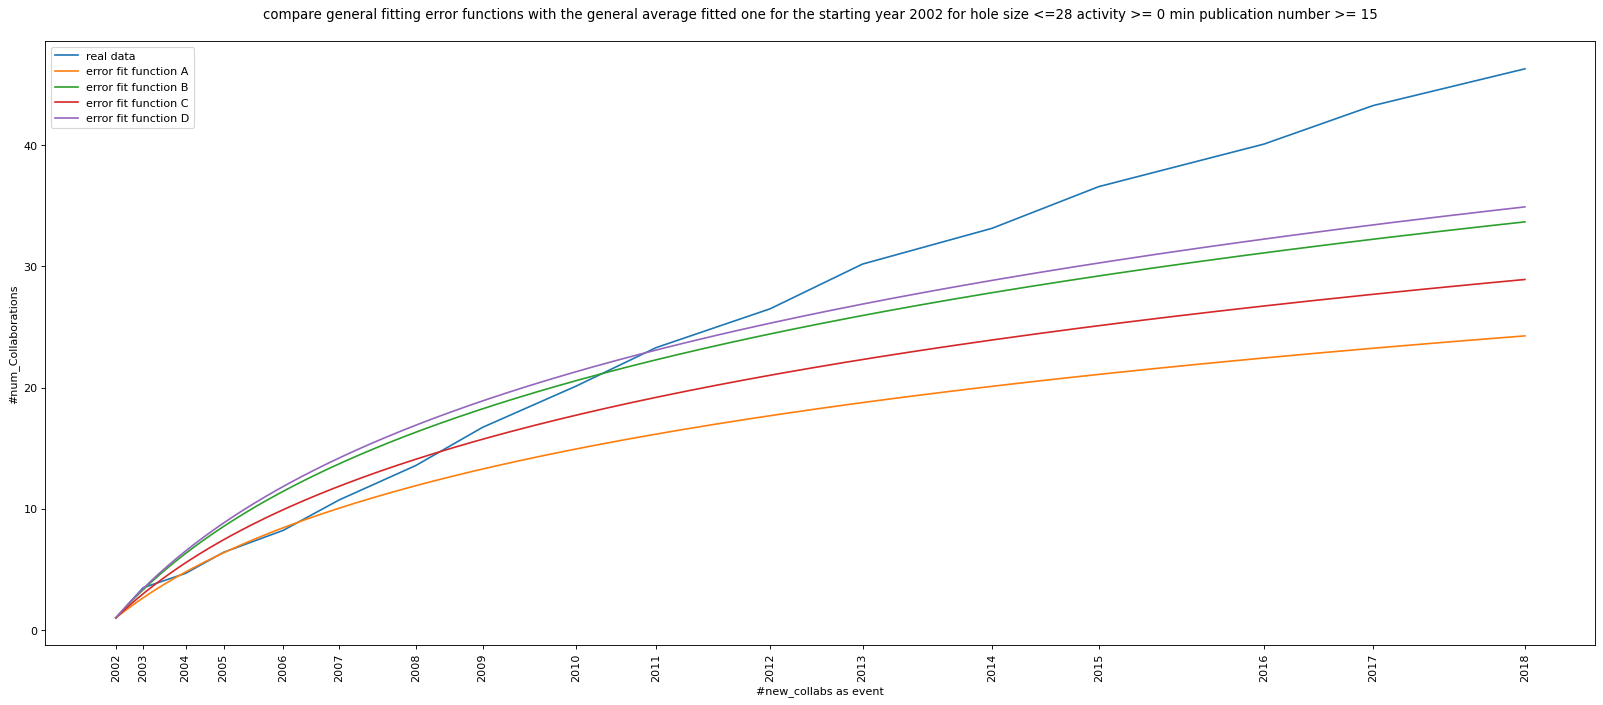

In [28]:
plot_all("2002")

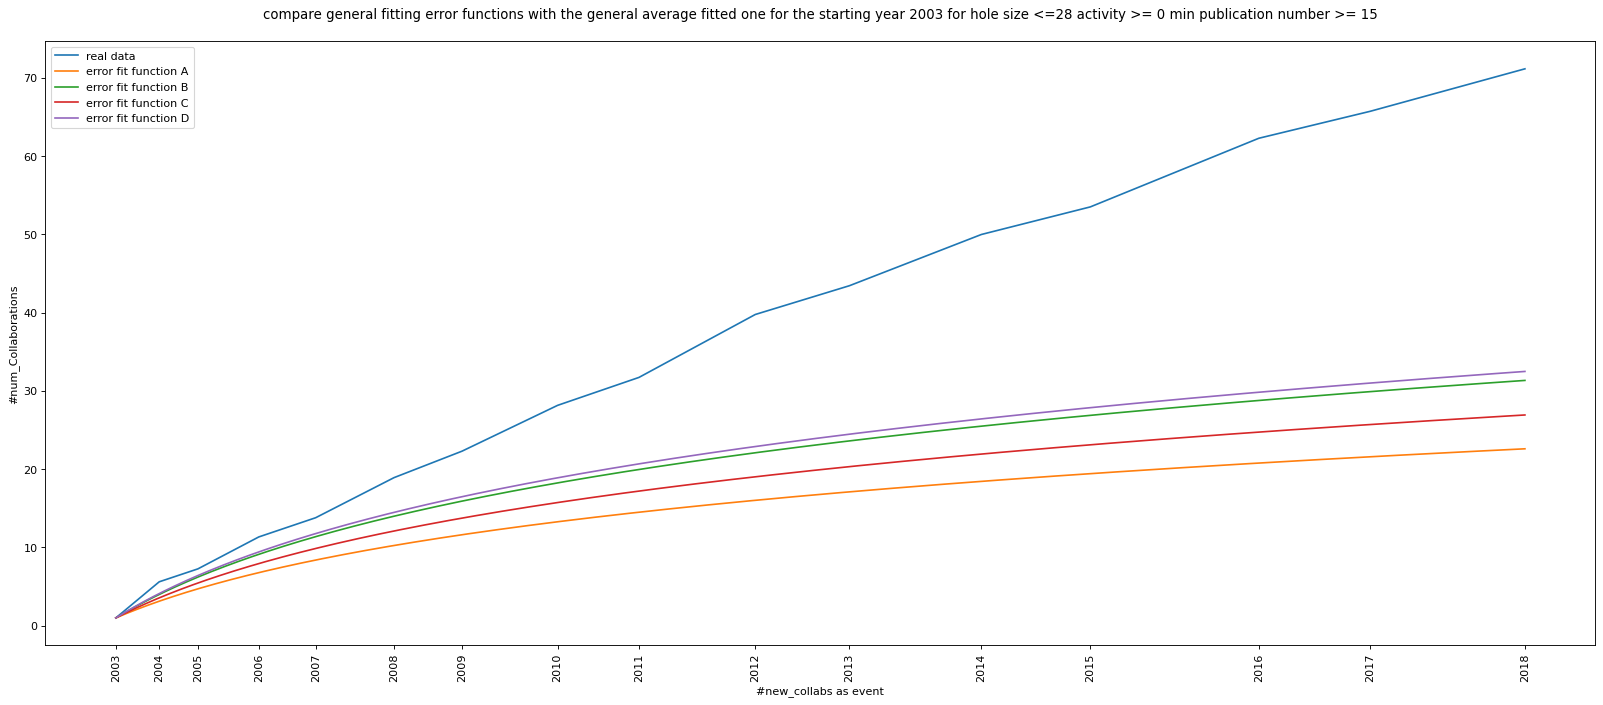

In [29]:
plot_all("2003")

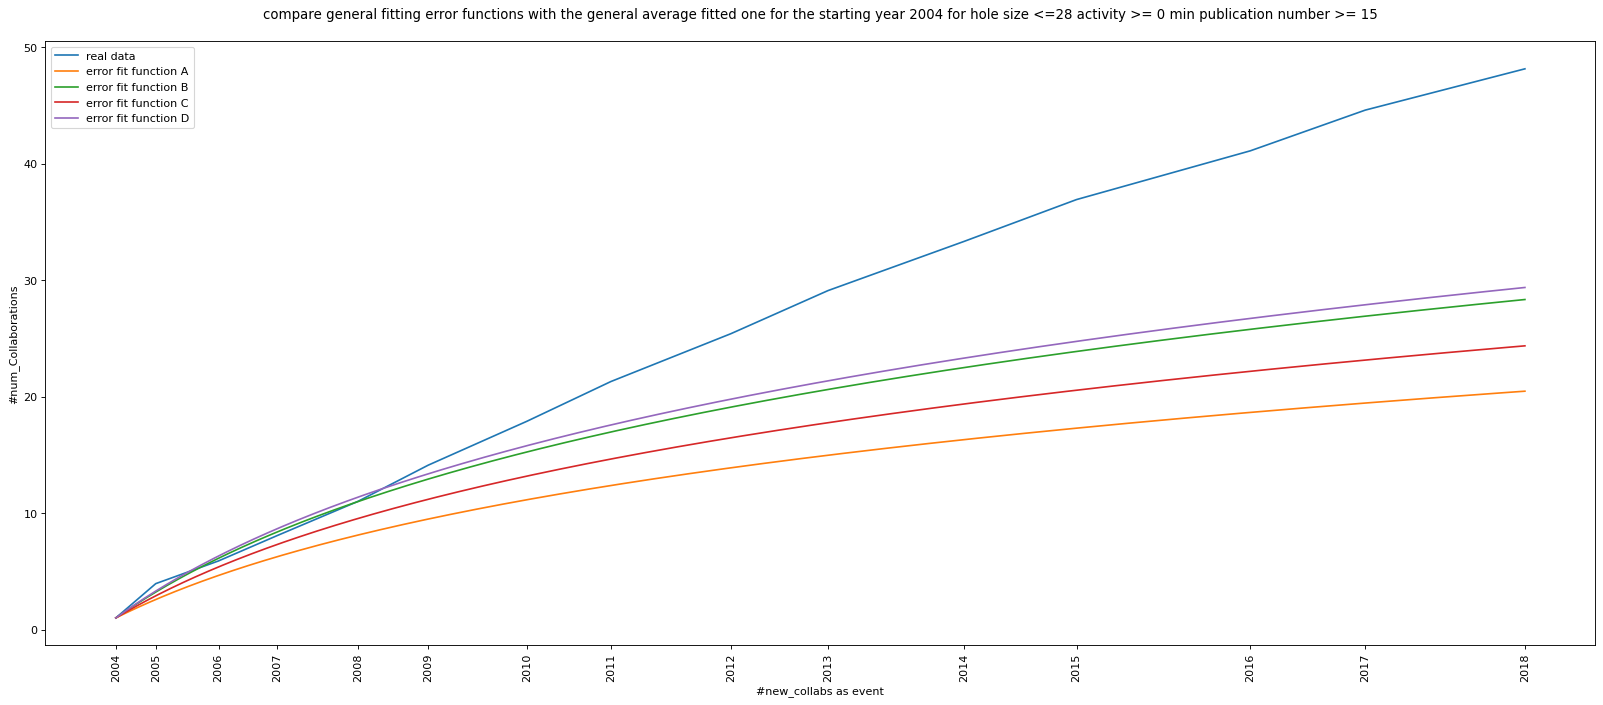

In [30]:
plot_all("2004")

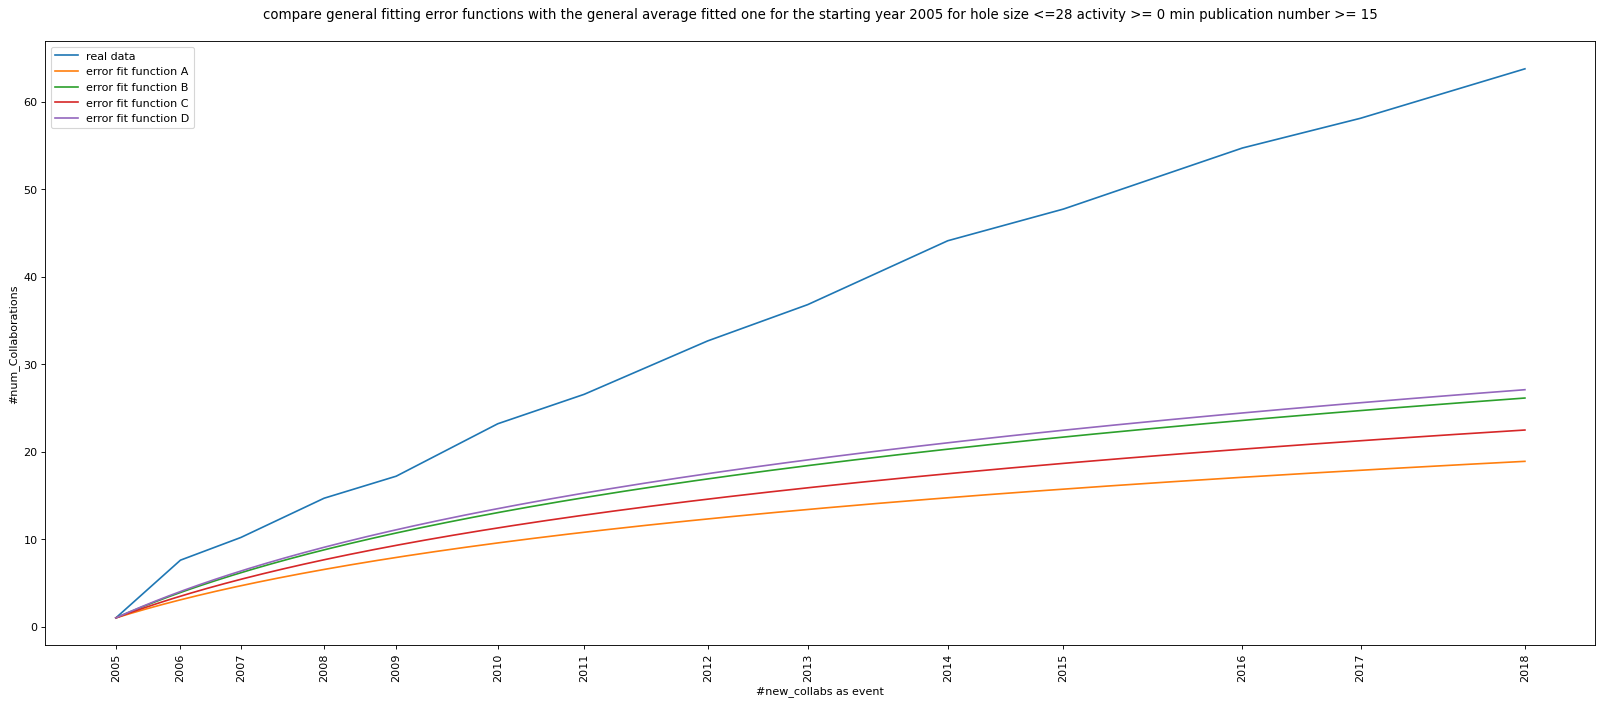

In [31]:
plot_all("2005")

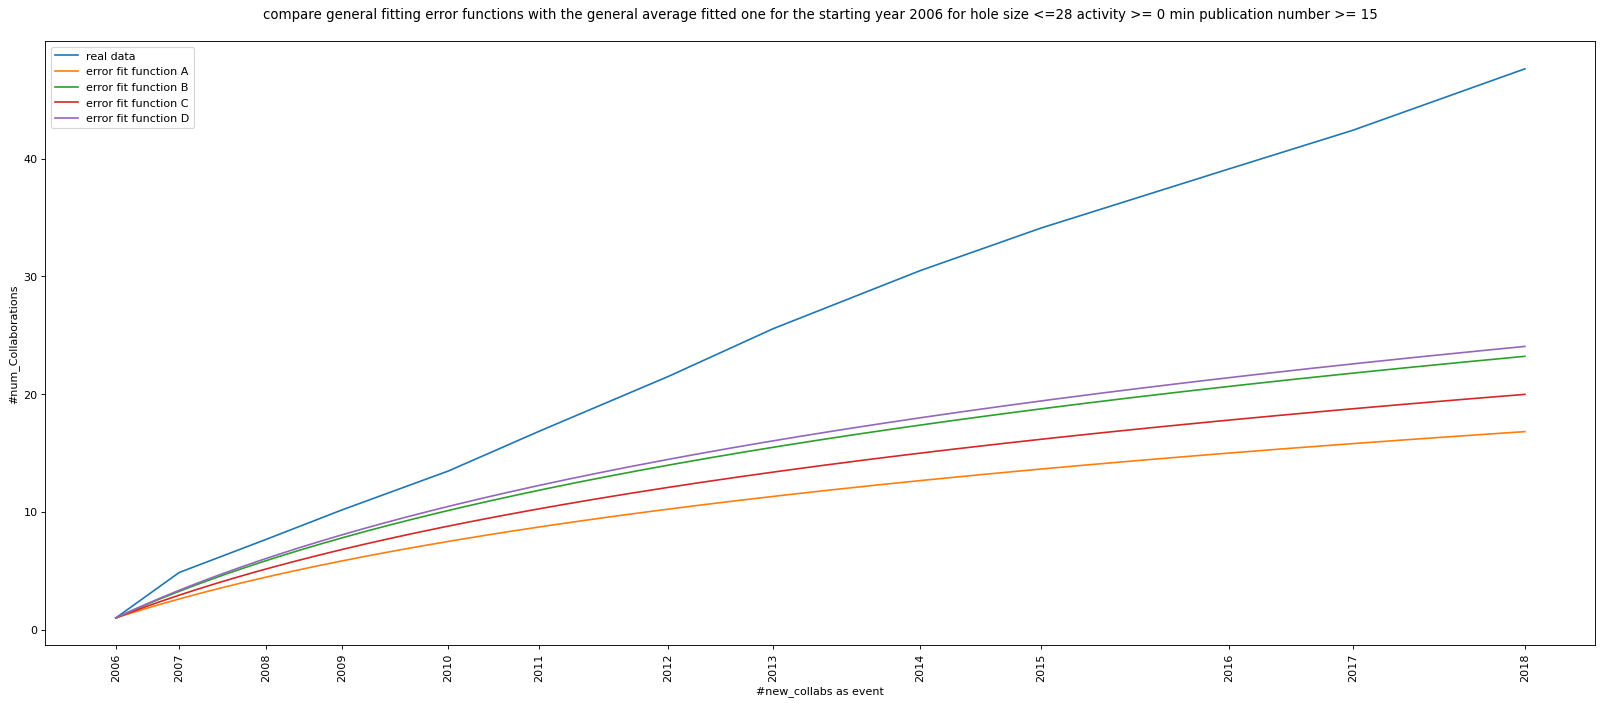

In [32]:
plot_all("2006")

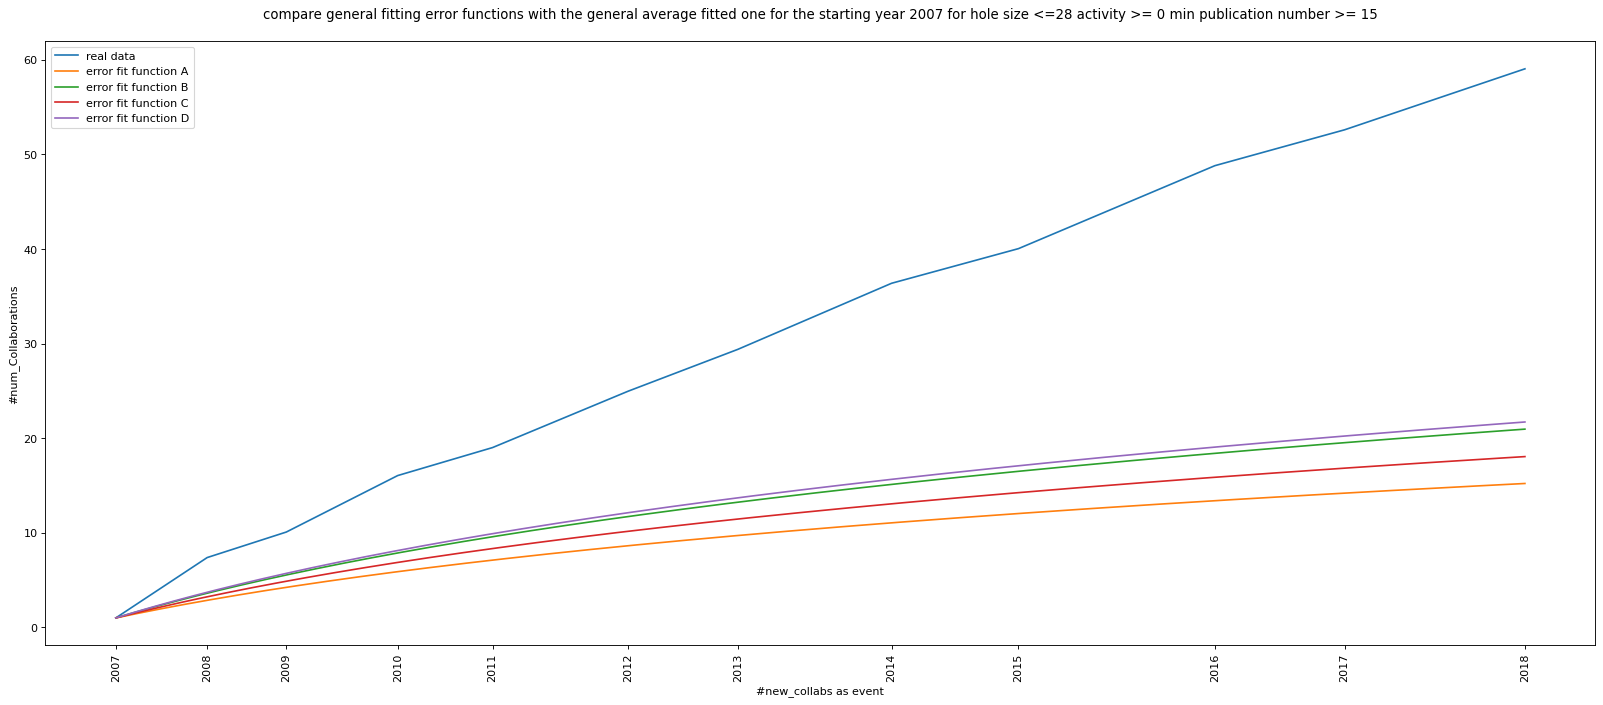

In [33]:
plot_all("2007")

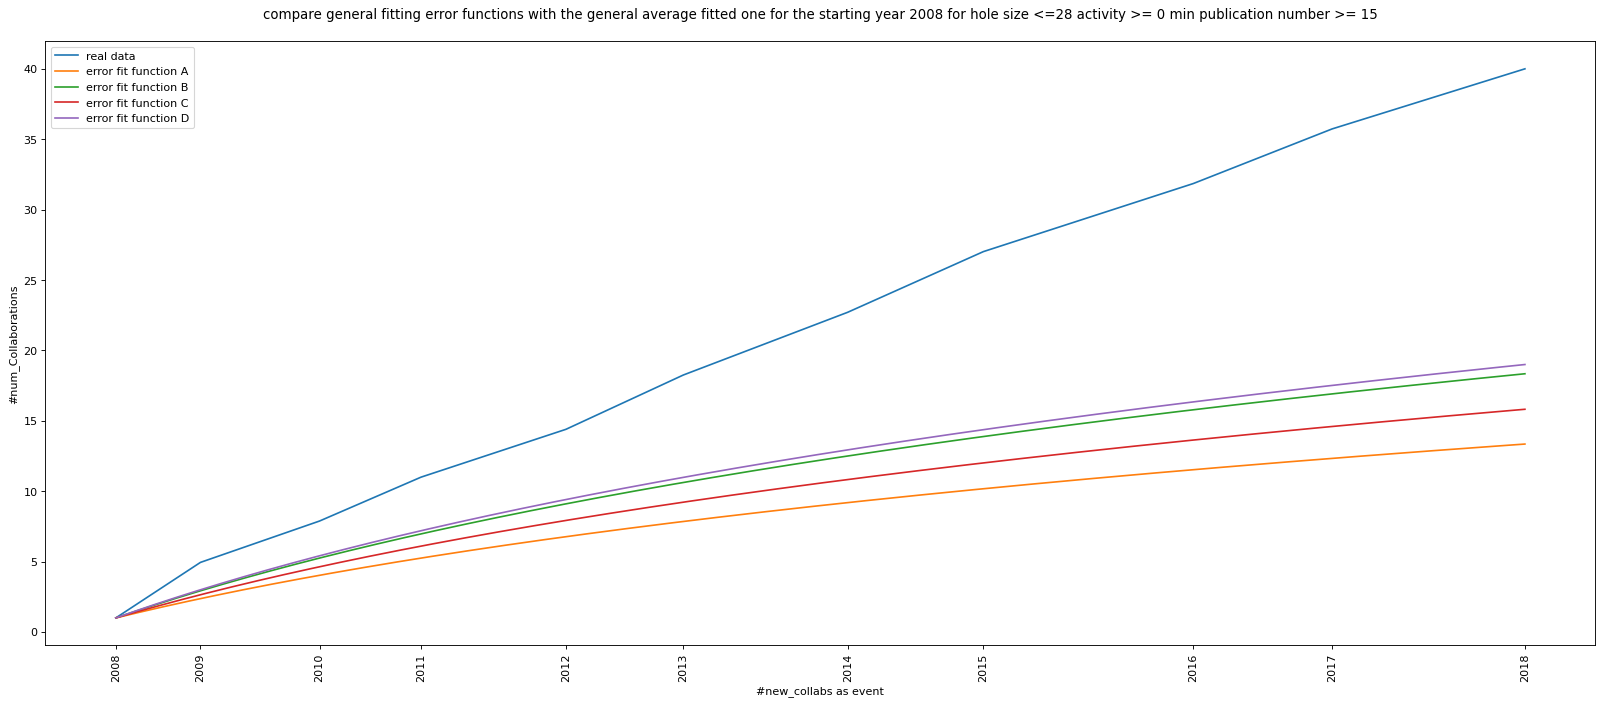

In [34]:
plot_all("2008")

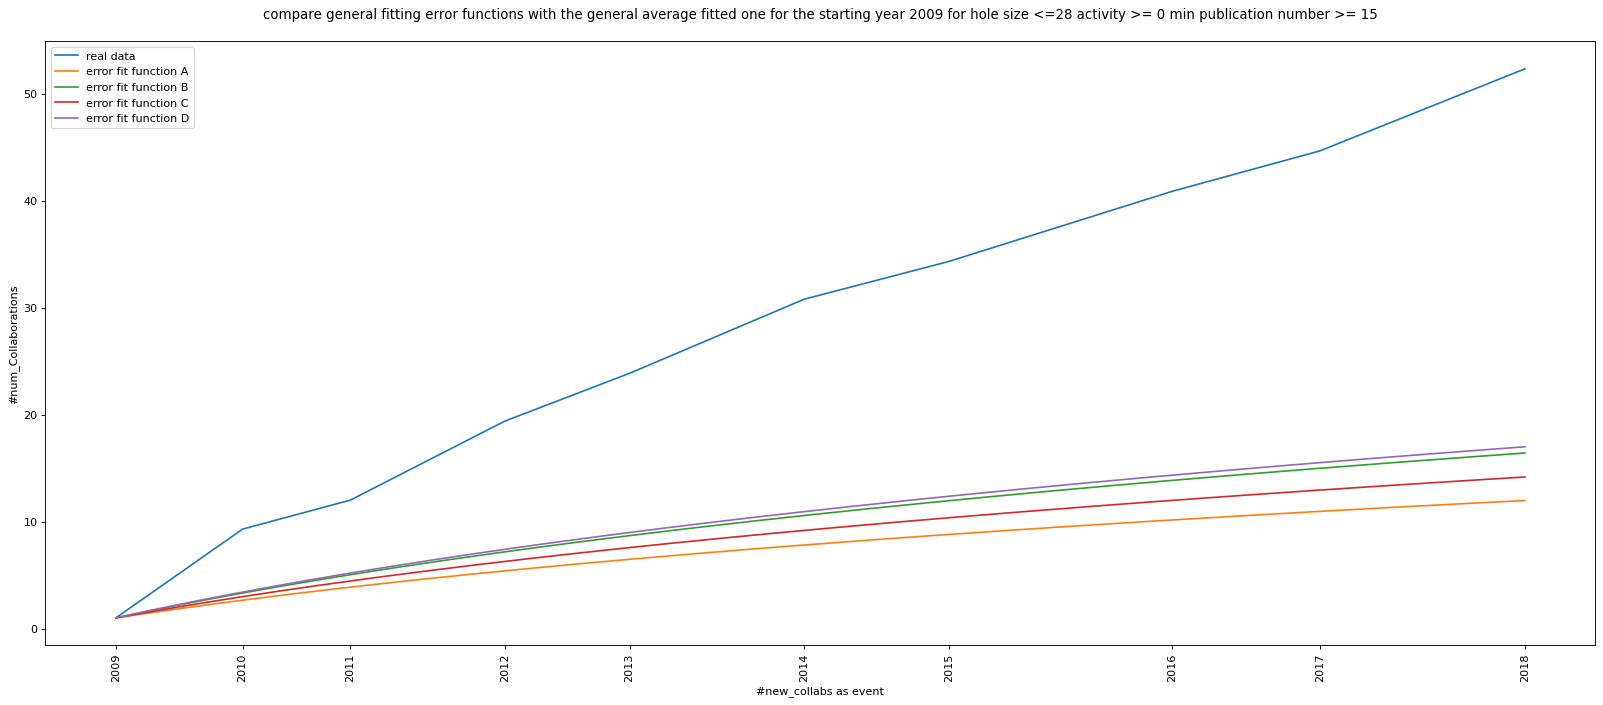

In [35]:
plot_all("2009")

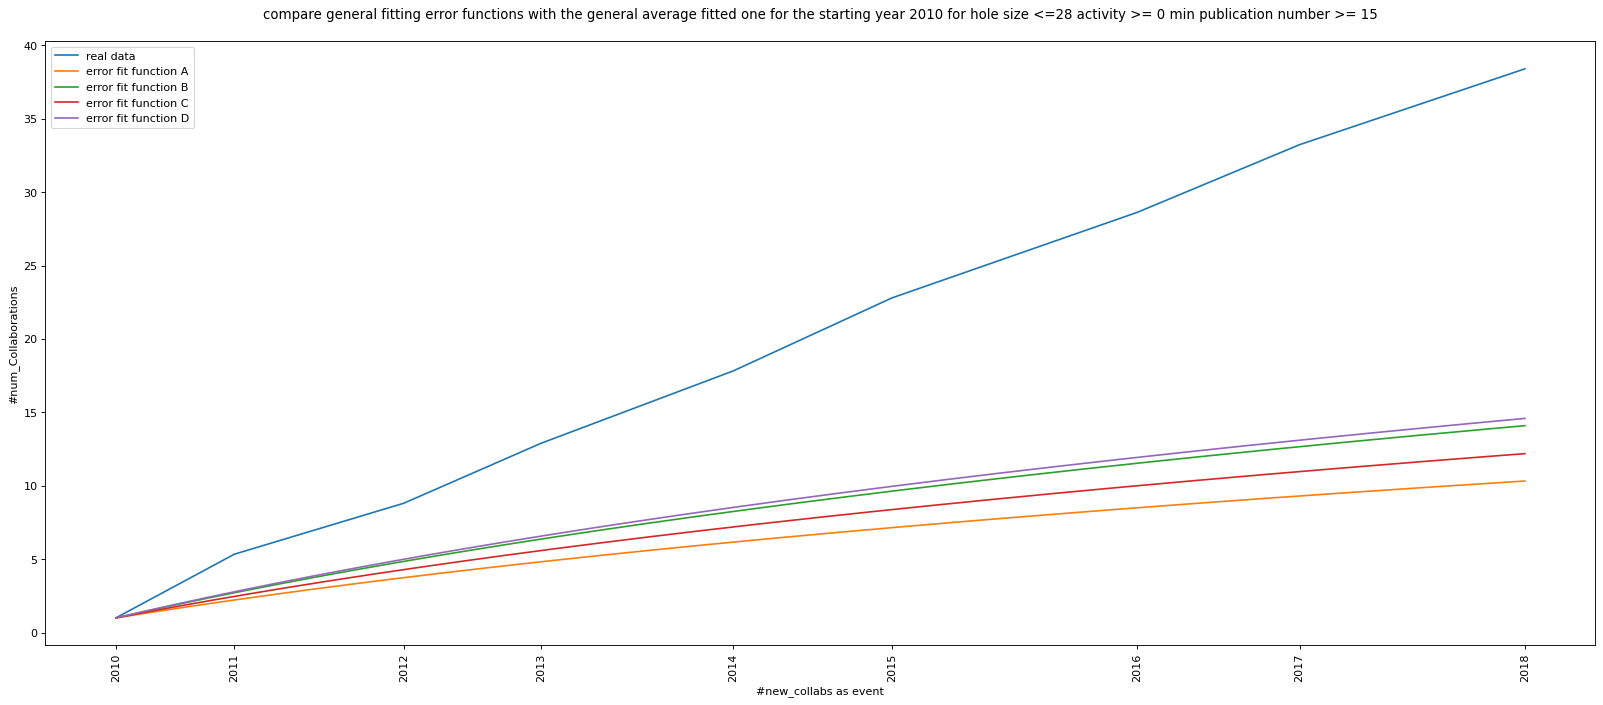

In [36]:
plot_all("2010")

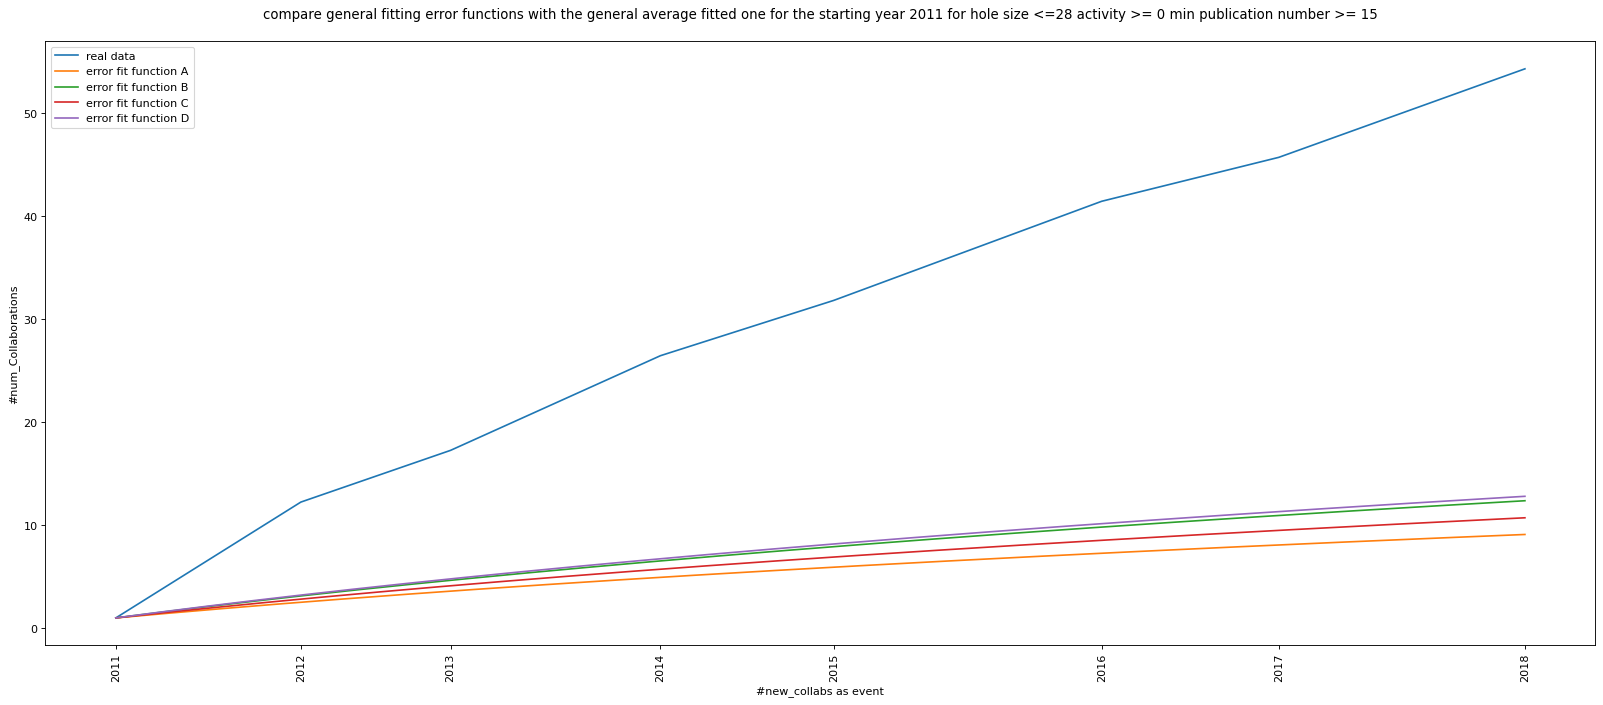

In [37]:
plot_all("2011")

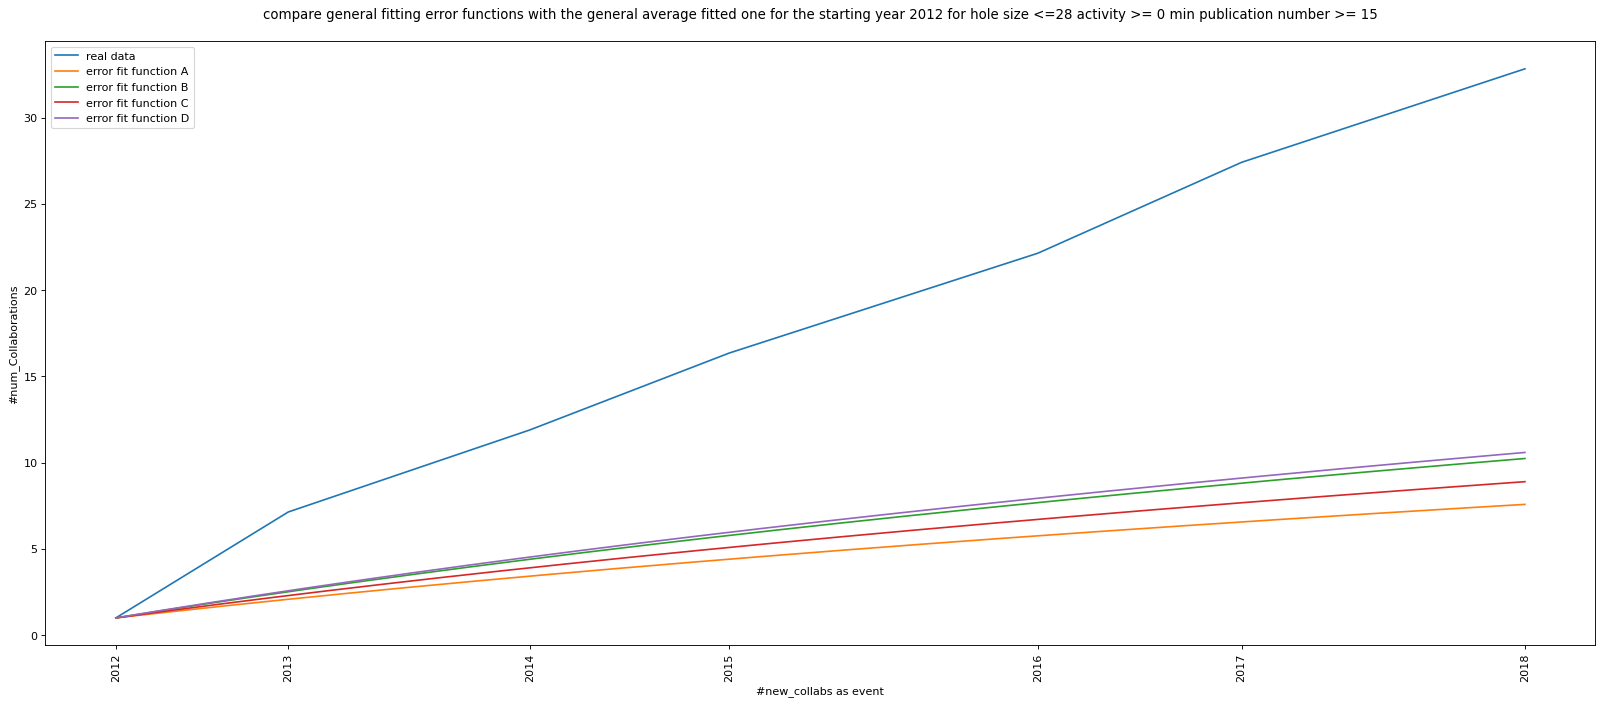

In [38]:
plot_all("2012")